In [1]:
enriched = Bkg(get_qcd_enriched('cutflow_studies/nocuts'))
genfilter = Bkg(get_qcd_bgen('cutflow_studies/nocuts'))
htbins = Bkg(get_qcd_pt('cutflow_studies/nocuts'))

Summer2018UL/cutflow_studies/nocuts/QCD/QCD_bEnriched_HT100to200_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Summer2018UL/cutflow_studies/nocuts/QCD/QCD_bEnriched_HT200to300_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Summer2018UL/cutflow_studies/nocuts/QCD/QCD_bEnriched_HT300to500_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Summer2018UL/cutflow_studies/nocuts/QCD/QCD_bEnriched_HT500to700_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Summer2018UL/cutflow_studies/nocuts/QCD/QCD_bEnriched_HT700to1000_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Summer2018UL/cutflow_studies/nocuts/QCD/QCD_bEnriched_HT1000to1500_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Summer2018UL/cutflow_studies/nocuts/QCD/QCD_bEnriched_HT1500to2000_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Summer2018UL/cutflow_studies/nocuts/QCD/QCD_bEnriched_HT2000toInf_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
[100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000]
Summer2018UL/cutflow_studies/nocuts/QCD/QCD_HT100to200_BGenFilter

In [4]:
htbin_strings = []
for sample in enriched.sample:
    htbin_strings.append([out for out in sample.split('_') if 'HT' in out][0])

indices = []
for bins in htbin_strings:
    for i,sample in enumerate(htbins.sample):
        if bins in sample:
            indices.append(int(i))
            break

In [2]:
enriched_b_mask = [ak.sum(abs(x) == 5, axis=1) for x in enriched.jet_partonFlav]
genfilter_b_mask = [ak.sum(abs(x) == 5, axis=1) for x in genfilter.jet_partonFlav]
htbins_b_mask = [ak.sum(abs(x) == 5, axis=1) for x in htbins.jet_partonFlav]

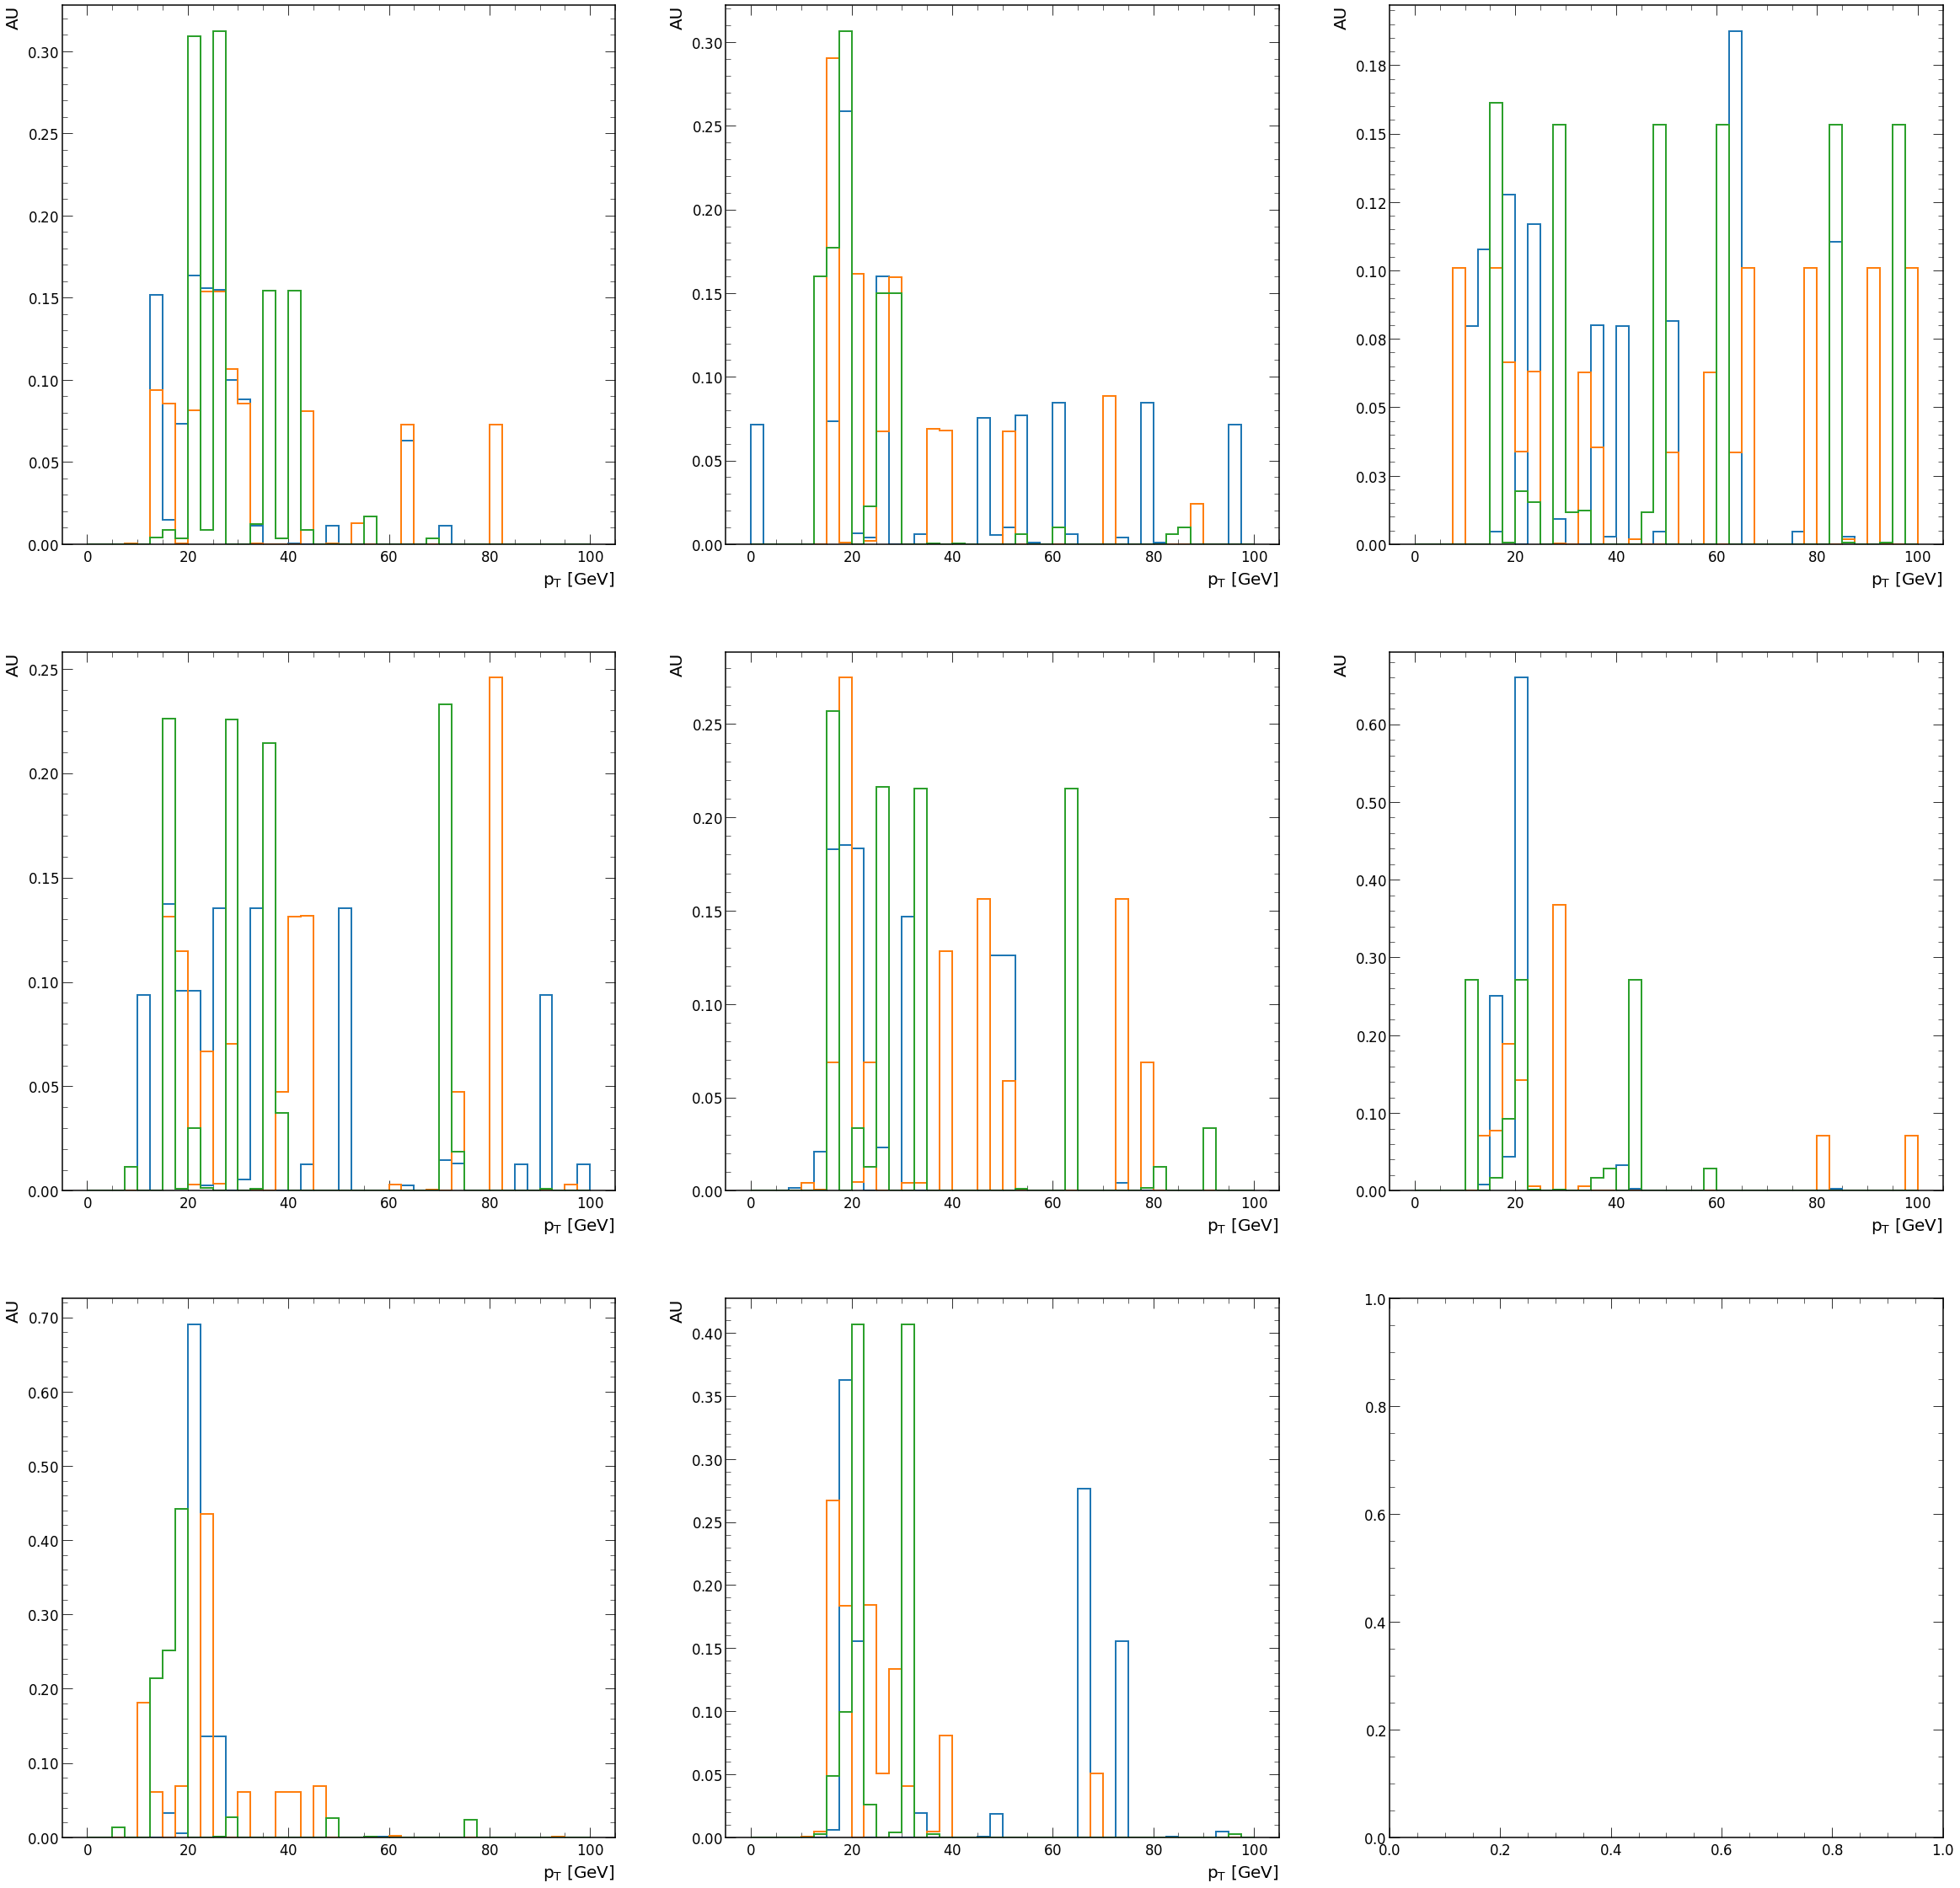

In [10]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(40,40))

bins = np.linspace(0,100,41)
for i,ax in enumerate(axs.flatten()[:-1]):
    j = indices[i]

    Hist(enriched.jet_pt[i][enriched_b_mask[i]], bins=bins, ax=ax, label=enriched.sample[i], density=True)
    Hist(genfilter.jet_pt[i][genfilter_b_mask[i]], bins=bins, ax=ax, label=genfilter.sample[i], density=True)
    Hist(htbins.jet_pt[j][htbins_b_mask[j]], bins=bins, ax=ax, label=htbins.sample[j], density=True)
    
    # ax.set_xticks(range(0,21,2))
    ax.set_xlabel(r"$p_T$ [GeV]")
    ax.set_ylabel('AU')

In [14]:
enriched_n_loose_bs = [ak.sum(x > 0.0490, axis=1) for x in enriched.get('jet_btag')]
enriched_n_medium_bs = [ak.sum(x > 0.2783, axis=1) for x in enriched.get('jet_btag')]
enriched_n_tight_bs = [ak.sum(x > 0.7100, axis=1) for x in enriched.get('jet_btag')]

genfilter_n_loose_bs = [ak.sum(x > 0.0490, axis=1) for x in genfilter.get('jet_btag')]
genfilter_n_medium_bs = [ak.sum(x > 0.2783, axis=1) for x in genfilter.get('jet_btag')]
genfilter_n_tight_bs = [ak.sum(x > 0.7100, axis=1) for x in genfilter.get('jet_btag')]

htbins_n_loose_bs = [ak.sum(x > 0.0490, axis=1) for x in htbins.get('jet_btag')]
htbins_n_medium_bs = [ak.sum(x > 0.2783, axis=1) for x in htbins.get('jet_btag')]
htbins_n_tight_bs = [ak.sum(x > 0.7100, axis=1) for x in htbins.get('jet_btag')]

[6.8860e-02 5.3007e-01 3.7872e-01 2.0270e-02 1.9900e-03 9.0000e-05]
[2.4290e-02 4.2846e-01 5.0703e-01 3.4470e-02 5.5400e-03 2.1000e-04]
[1.4150e-02 3.9665e-01 5.3476e-01 4.5530e-02 8.4700e-03 4.4000e-04]
[0.00825 0.37978 0.5485  0.0519  0.0109  0.00067]
[0.00519 0.37693 0.54784 0.05695 0.01217 0.00092]
[0.00392 0.38239 0.53936 0.05892 0.01432 0.00109]
[0.00297 0.38904 0.53089 0.06139 0.01448 0.00123]
[0.00228 0.40103 0.51783 0.06216 0.01534 0.00136]


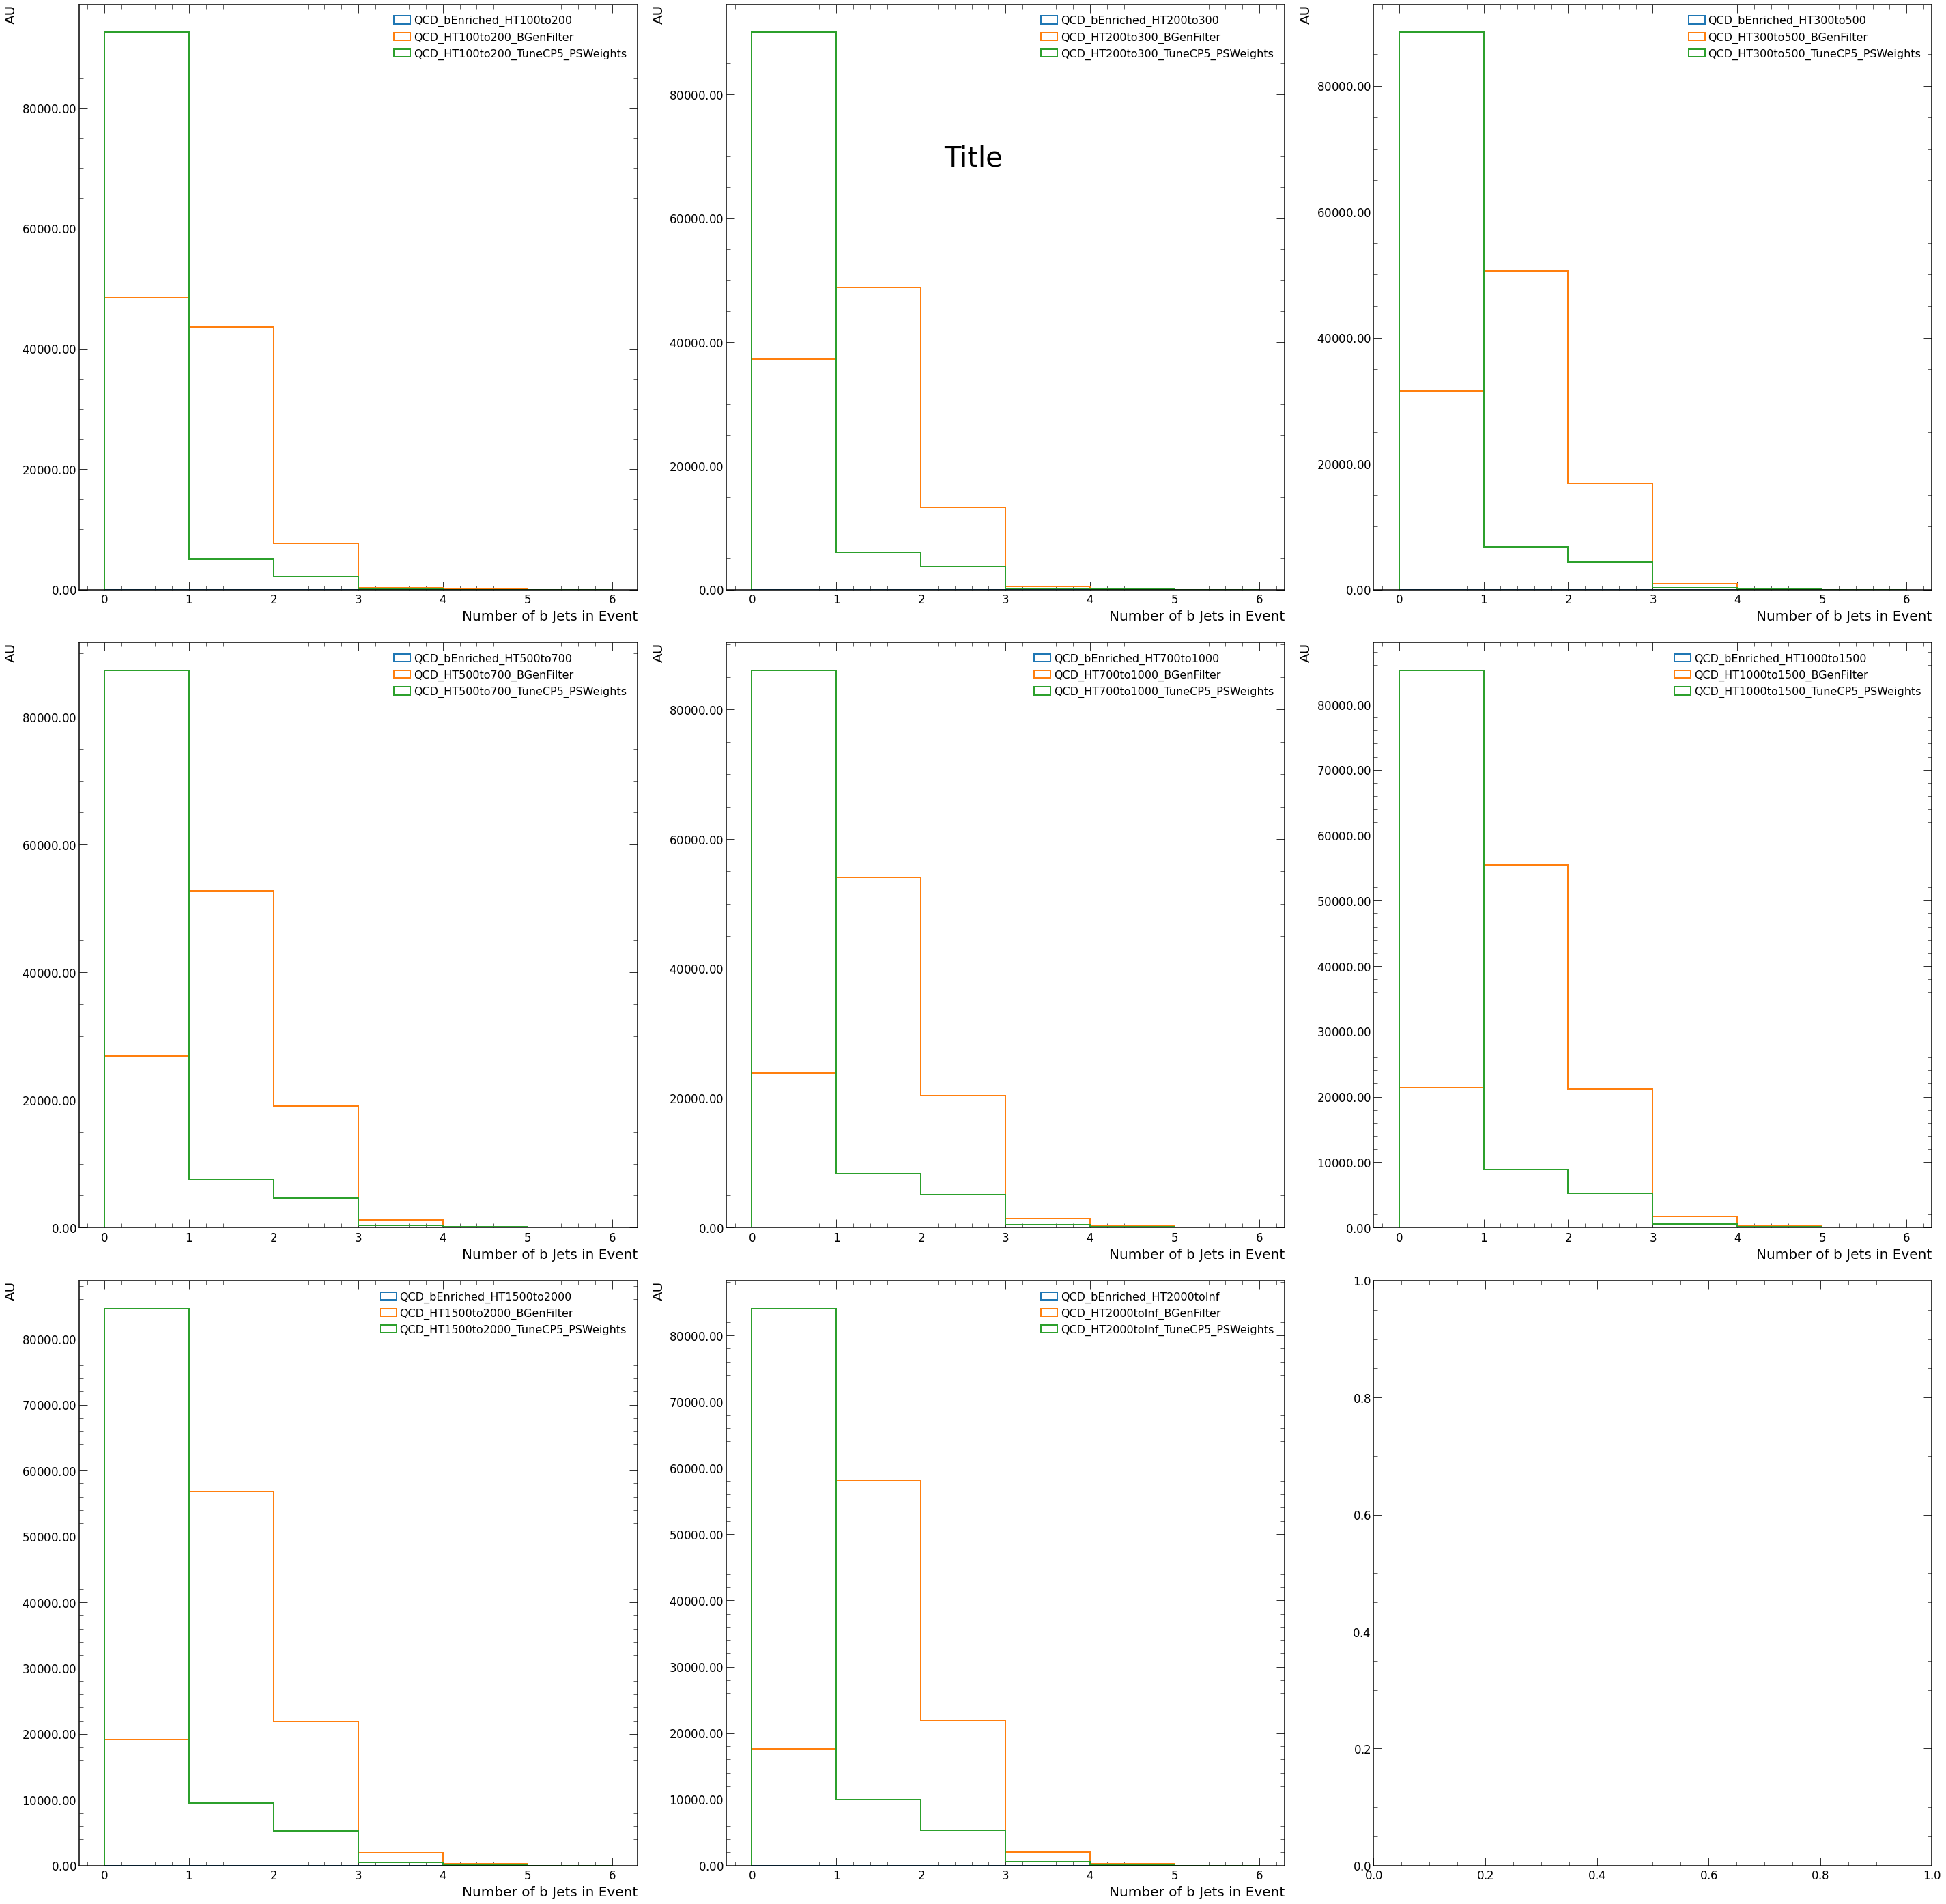

In [29]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(40,40))

fig.suptitle('Title', y=0.9, fontsize=40)

bins = np.arange(7)
for i,ax in enumerate(axs.flatten()[:-1]):
    j = indices[i]

    n = Hist(ak.sum(abs(enriched.jet_partonFlav[i]) == 5, axis=1), bins=bins, ax=ax, label=enriched.sample[i], density=True)
    print(n)
    Hist(ak.sum(abs(genfilter.jet_partonFlav[i]) == 5, axis=1), bins=bins, ax=ax, label=genfilter.sample[i], weights=genfilter.scales[i]/genfilter.scales[i].sum())
    Hist(ak.sum(abs(htbins.jet_partonFlav[j]) == 5, axis=1), bins=bins, ax=ax, label=htbins.sample[j], weights=htbins.scales[j]/htbins.scales[j].sum())
    
    ax.set_xticks(range(7))
    ax.set_xlabel(r"Number of b Jets in Event")
    ax.set_ylabel('AU')



[1.0191e-01 5.6177e-01 3.1417e-01 1.9820e-02 2.1600e-03 1.7000e-04]
[0.02418 0.44013 0.48784 0.04061 0.00674 0.0005 ]
[0.01101011 0.39479395 0.52594526 0.05665057 0.01054011 0.00106001]
[0.00427009 0.36771735 0.54631093 0.06586132 0.01399028 0.00185004]
[0.00212008 0.36183447 0.54700188 0.07102284 0.01593064 0.00209008]
[0.00151005 0.36470094 0.54148624 0.07188216 0.01791054 0.00251008]
[0.00071001 0.3698174  0.53453069 0.07362147 0.01873037 0.00259005]
[4.80028802e-04 3.81202872e-01 5.21761306e-01 7.36144169e-02
 1.98011881e-02 3.14018841e-03]


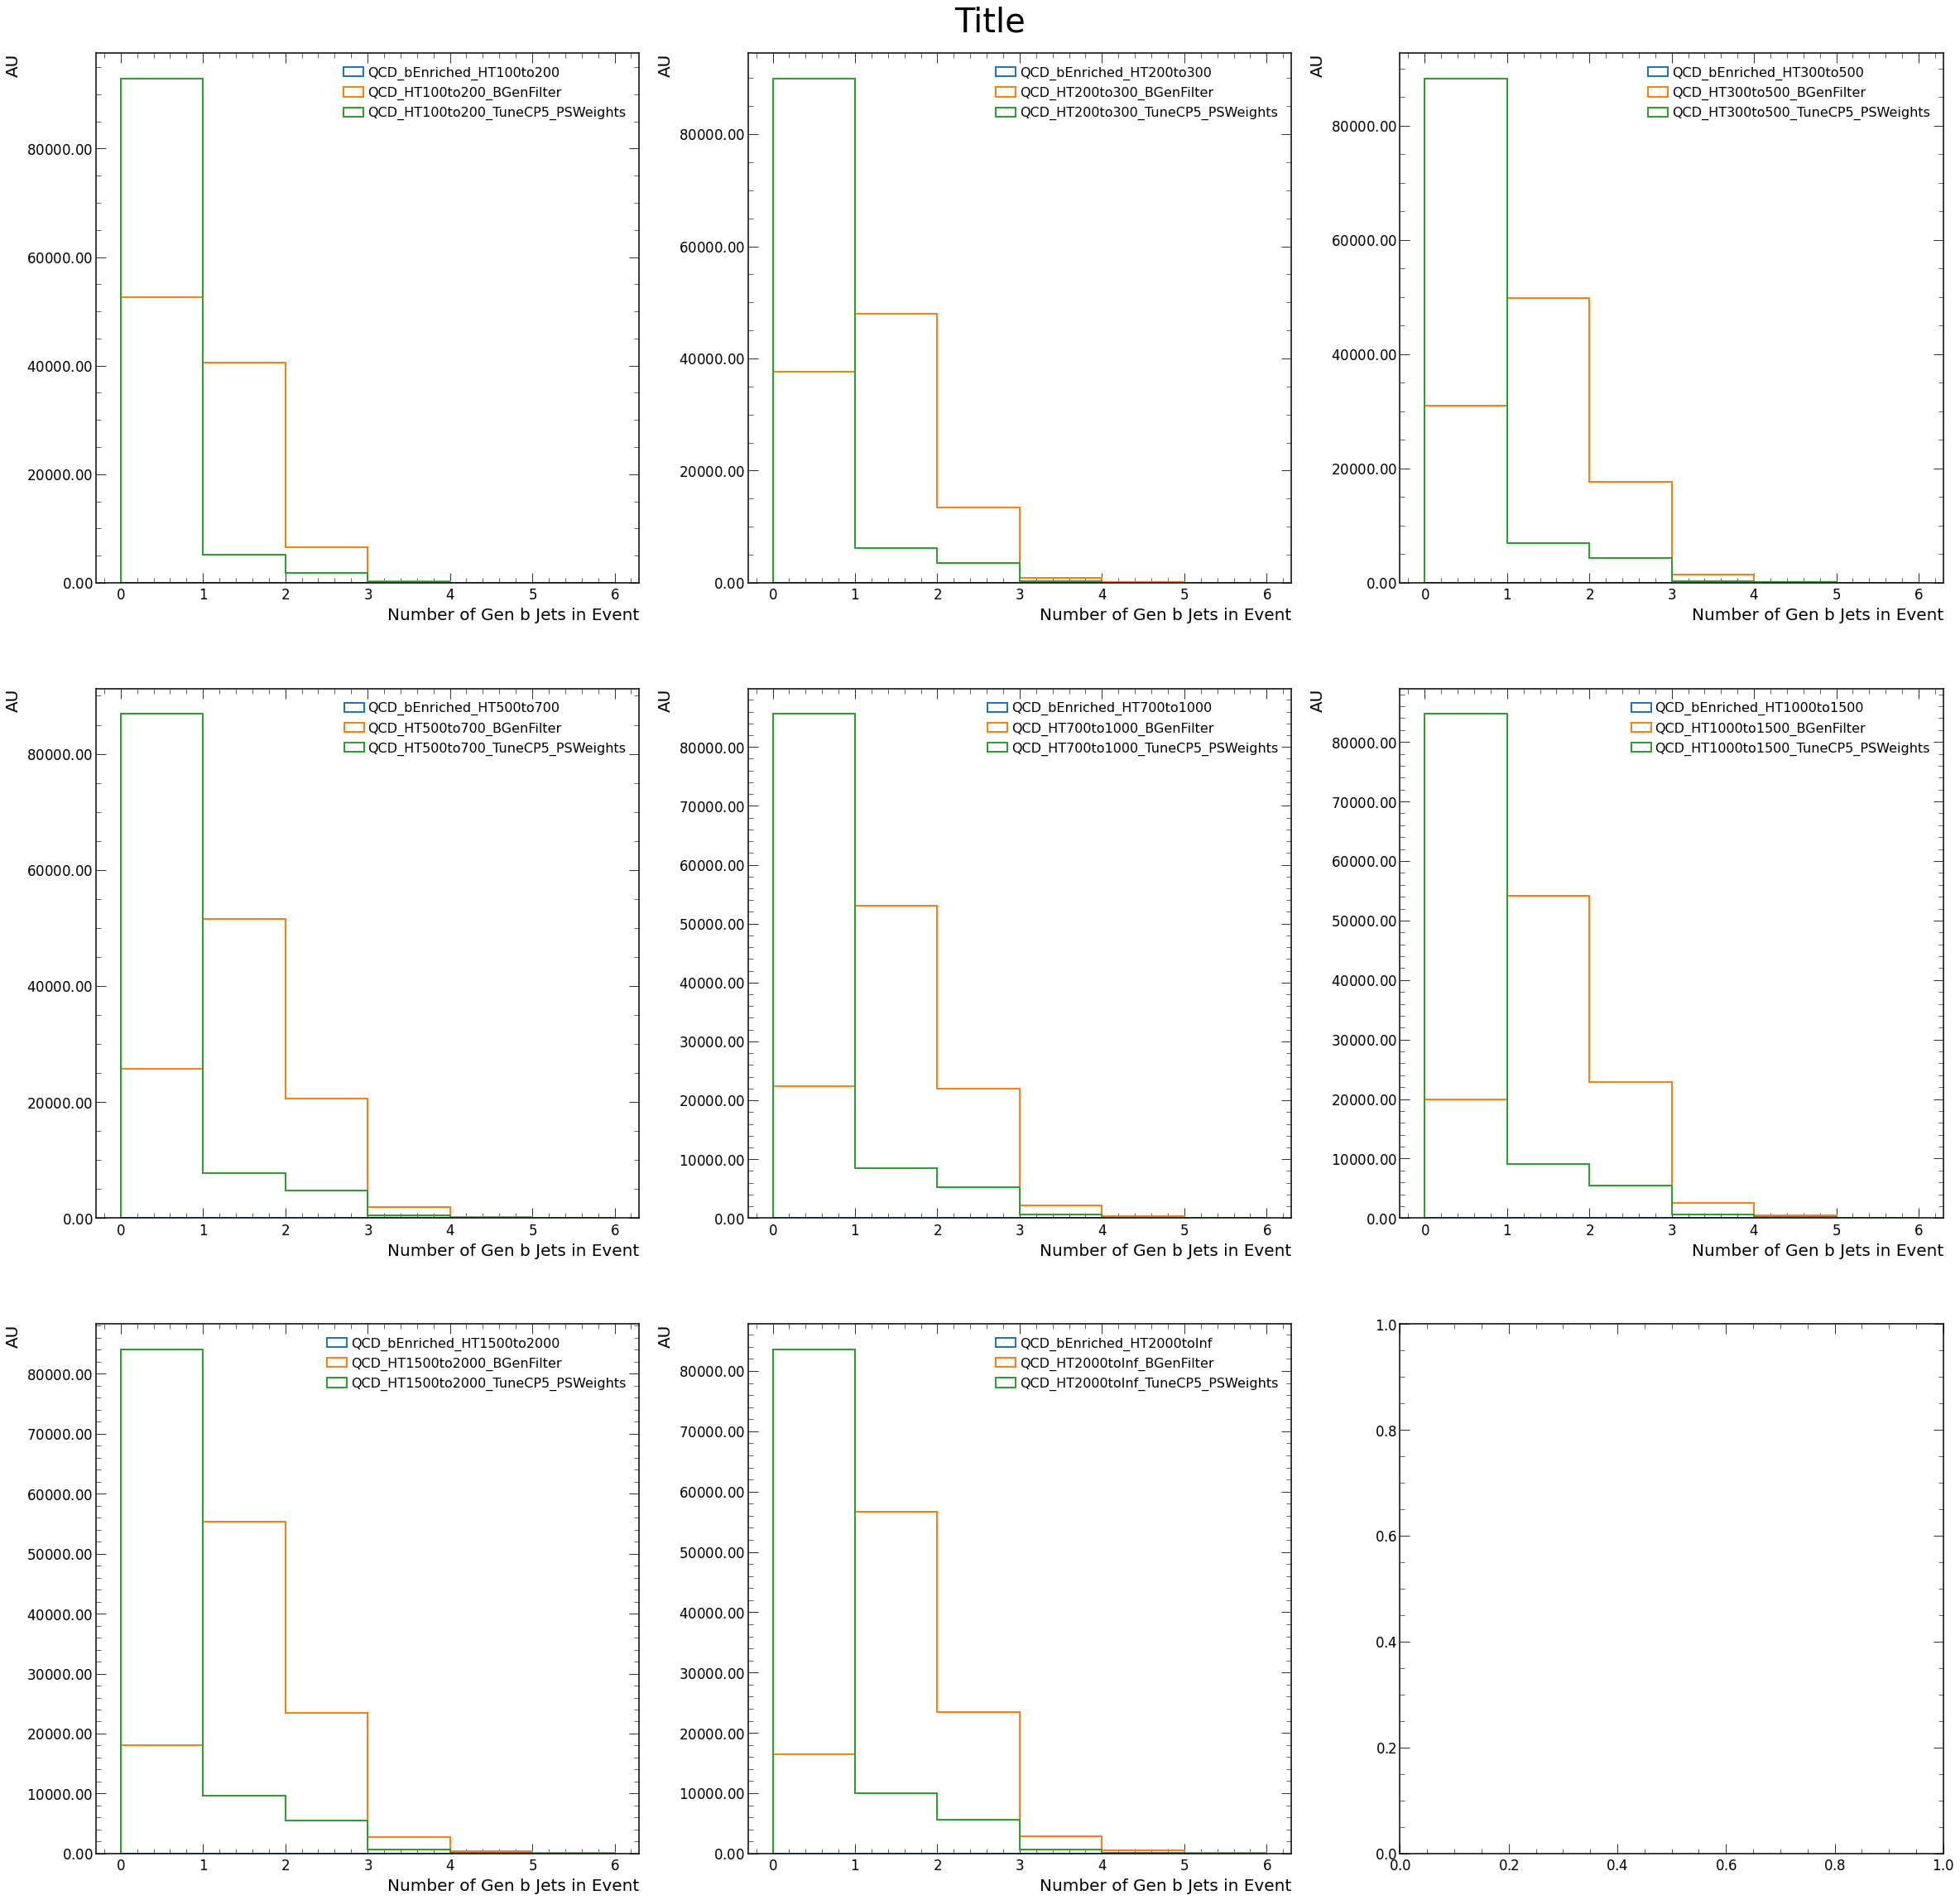

In [27]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(40,40))

fig.suptitle('Title', y=0.9, fontsize=40)

bins = np.arange(7)
for i,ax in enumerate(axs.flatten()[:-1]):
    j = indices[i]

    n = Hist(ak.sum(abs(enriched.genjet_partonFlav[i]) == 5, axis=1), bins=bins, ax=ax, label=enriched.sample[i], density=True)
    print(n)
    Hist(ak.sum(abs(genfilter.genjet_partonFlav[i]) == 5, axis=1), bins=bins, ax=ax, label=genfilter.sample[i], weights=genfilter.scales[i]/genfilter.scales[i].sum())
    Hist(ak.sum(abs(htbins.genjet_partonFlav[j]) == 5, axis=1), bins=bins, ax=ax, label=htbins.sample[j], weights=htbins.scales[j]/htbins.scales[j].sum())
    
    ax.set_xticks(range(7))
    ax.set_xlabel(r"Number of Gen b Jets in Event")
    ax.set_ylabel('AU')


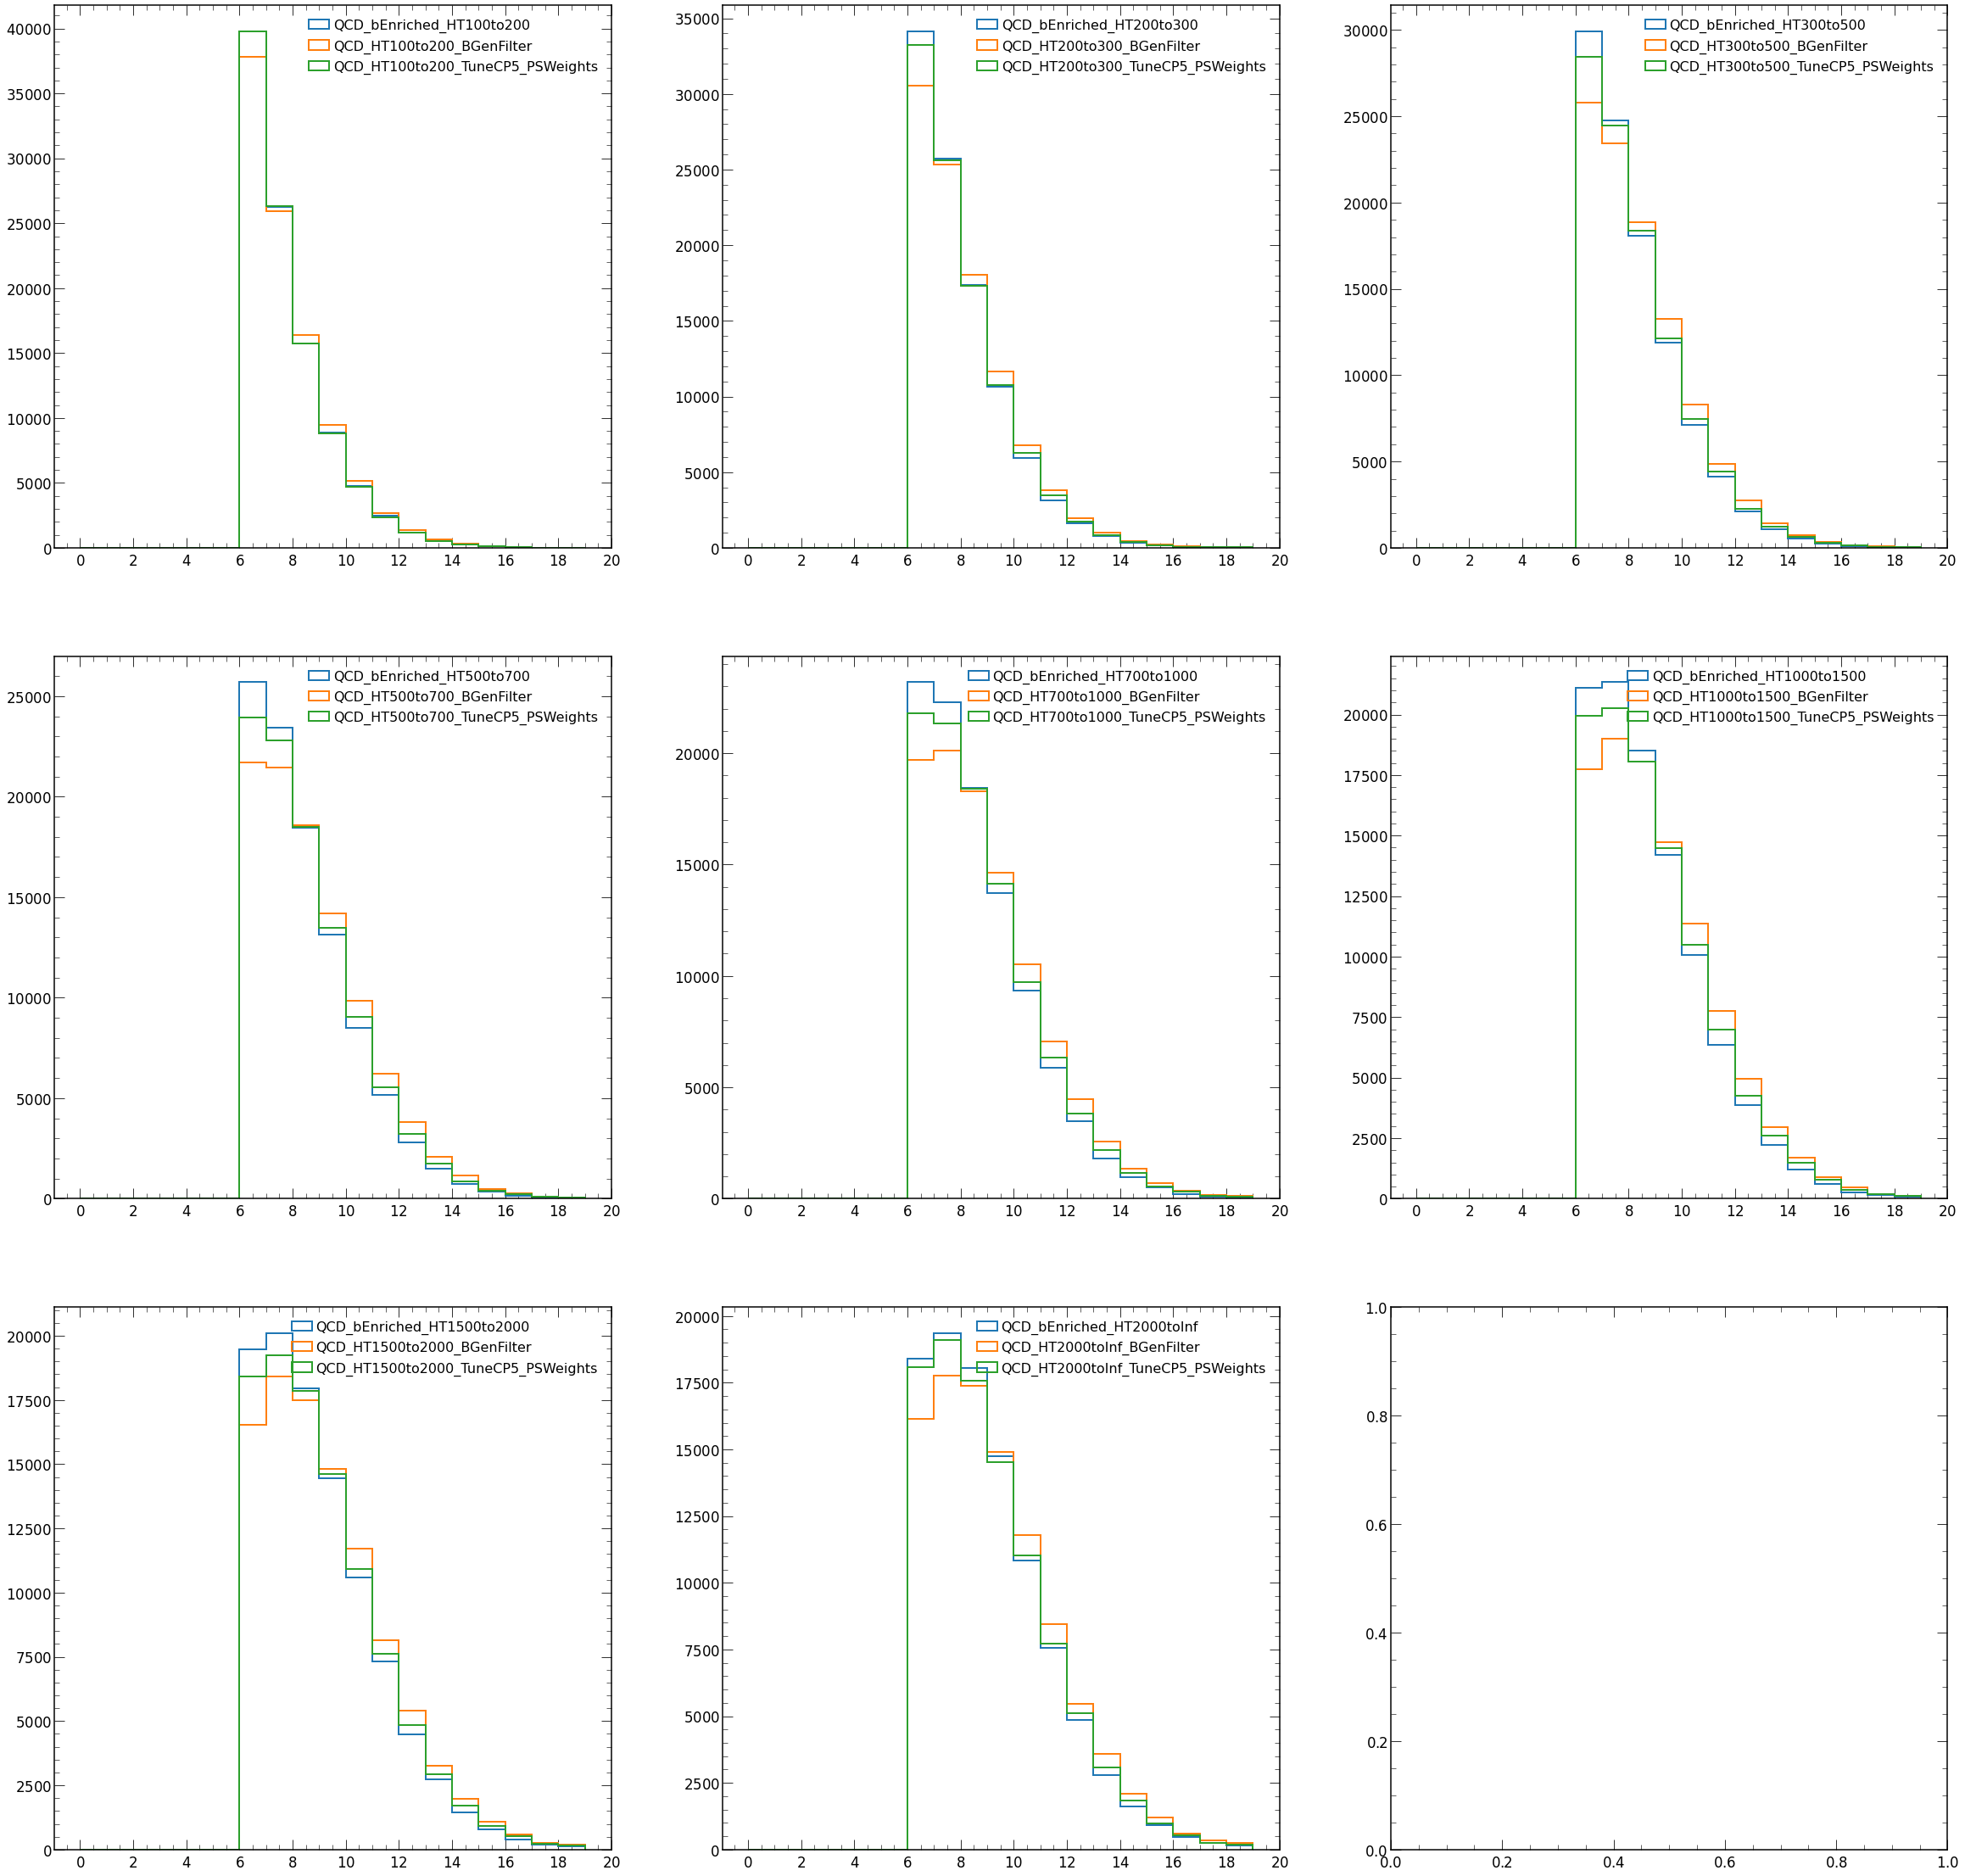

In [24]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(40,40))

bins = np.arange(20)

for i,ax in enumerate(axs.flatten()[:-1]):
    j = indices[i]

    Hist(enriched.get('n_jet')[i], bins=bins, ax=ax, label=enriched.sample[i], weights=enriched.scales[i]/enriched.scales[i].sum())
    Hist(genfilter.get('n_jet')[i], bins=bins, ax=ax, label=genfilter.sample[i], weights=genfilter.scales[i]/genfilter.scales[i].sum())
    Hist(htbins.get('n_jet')[j], bins=bins, ax=ax, label=htbins.sample[j], weights=htbins.scales[j]/htbins.scales[j].sum())
    ax.set_xticks(range(0,21,2))

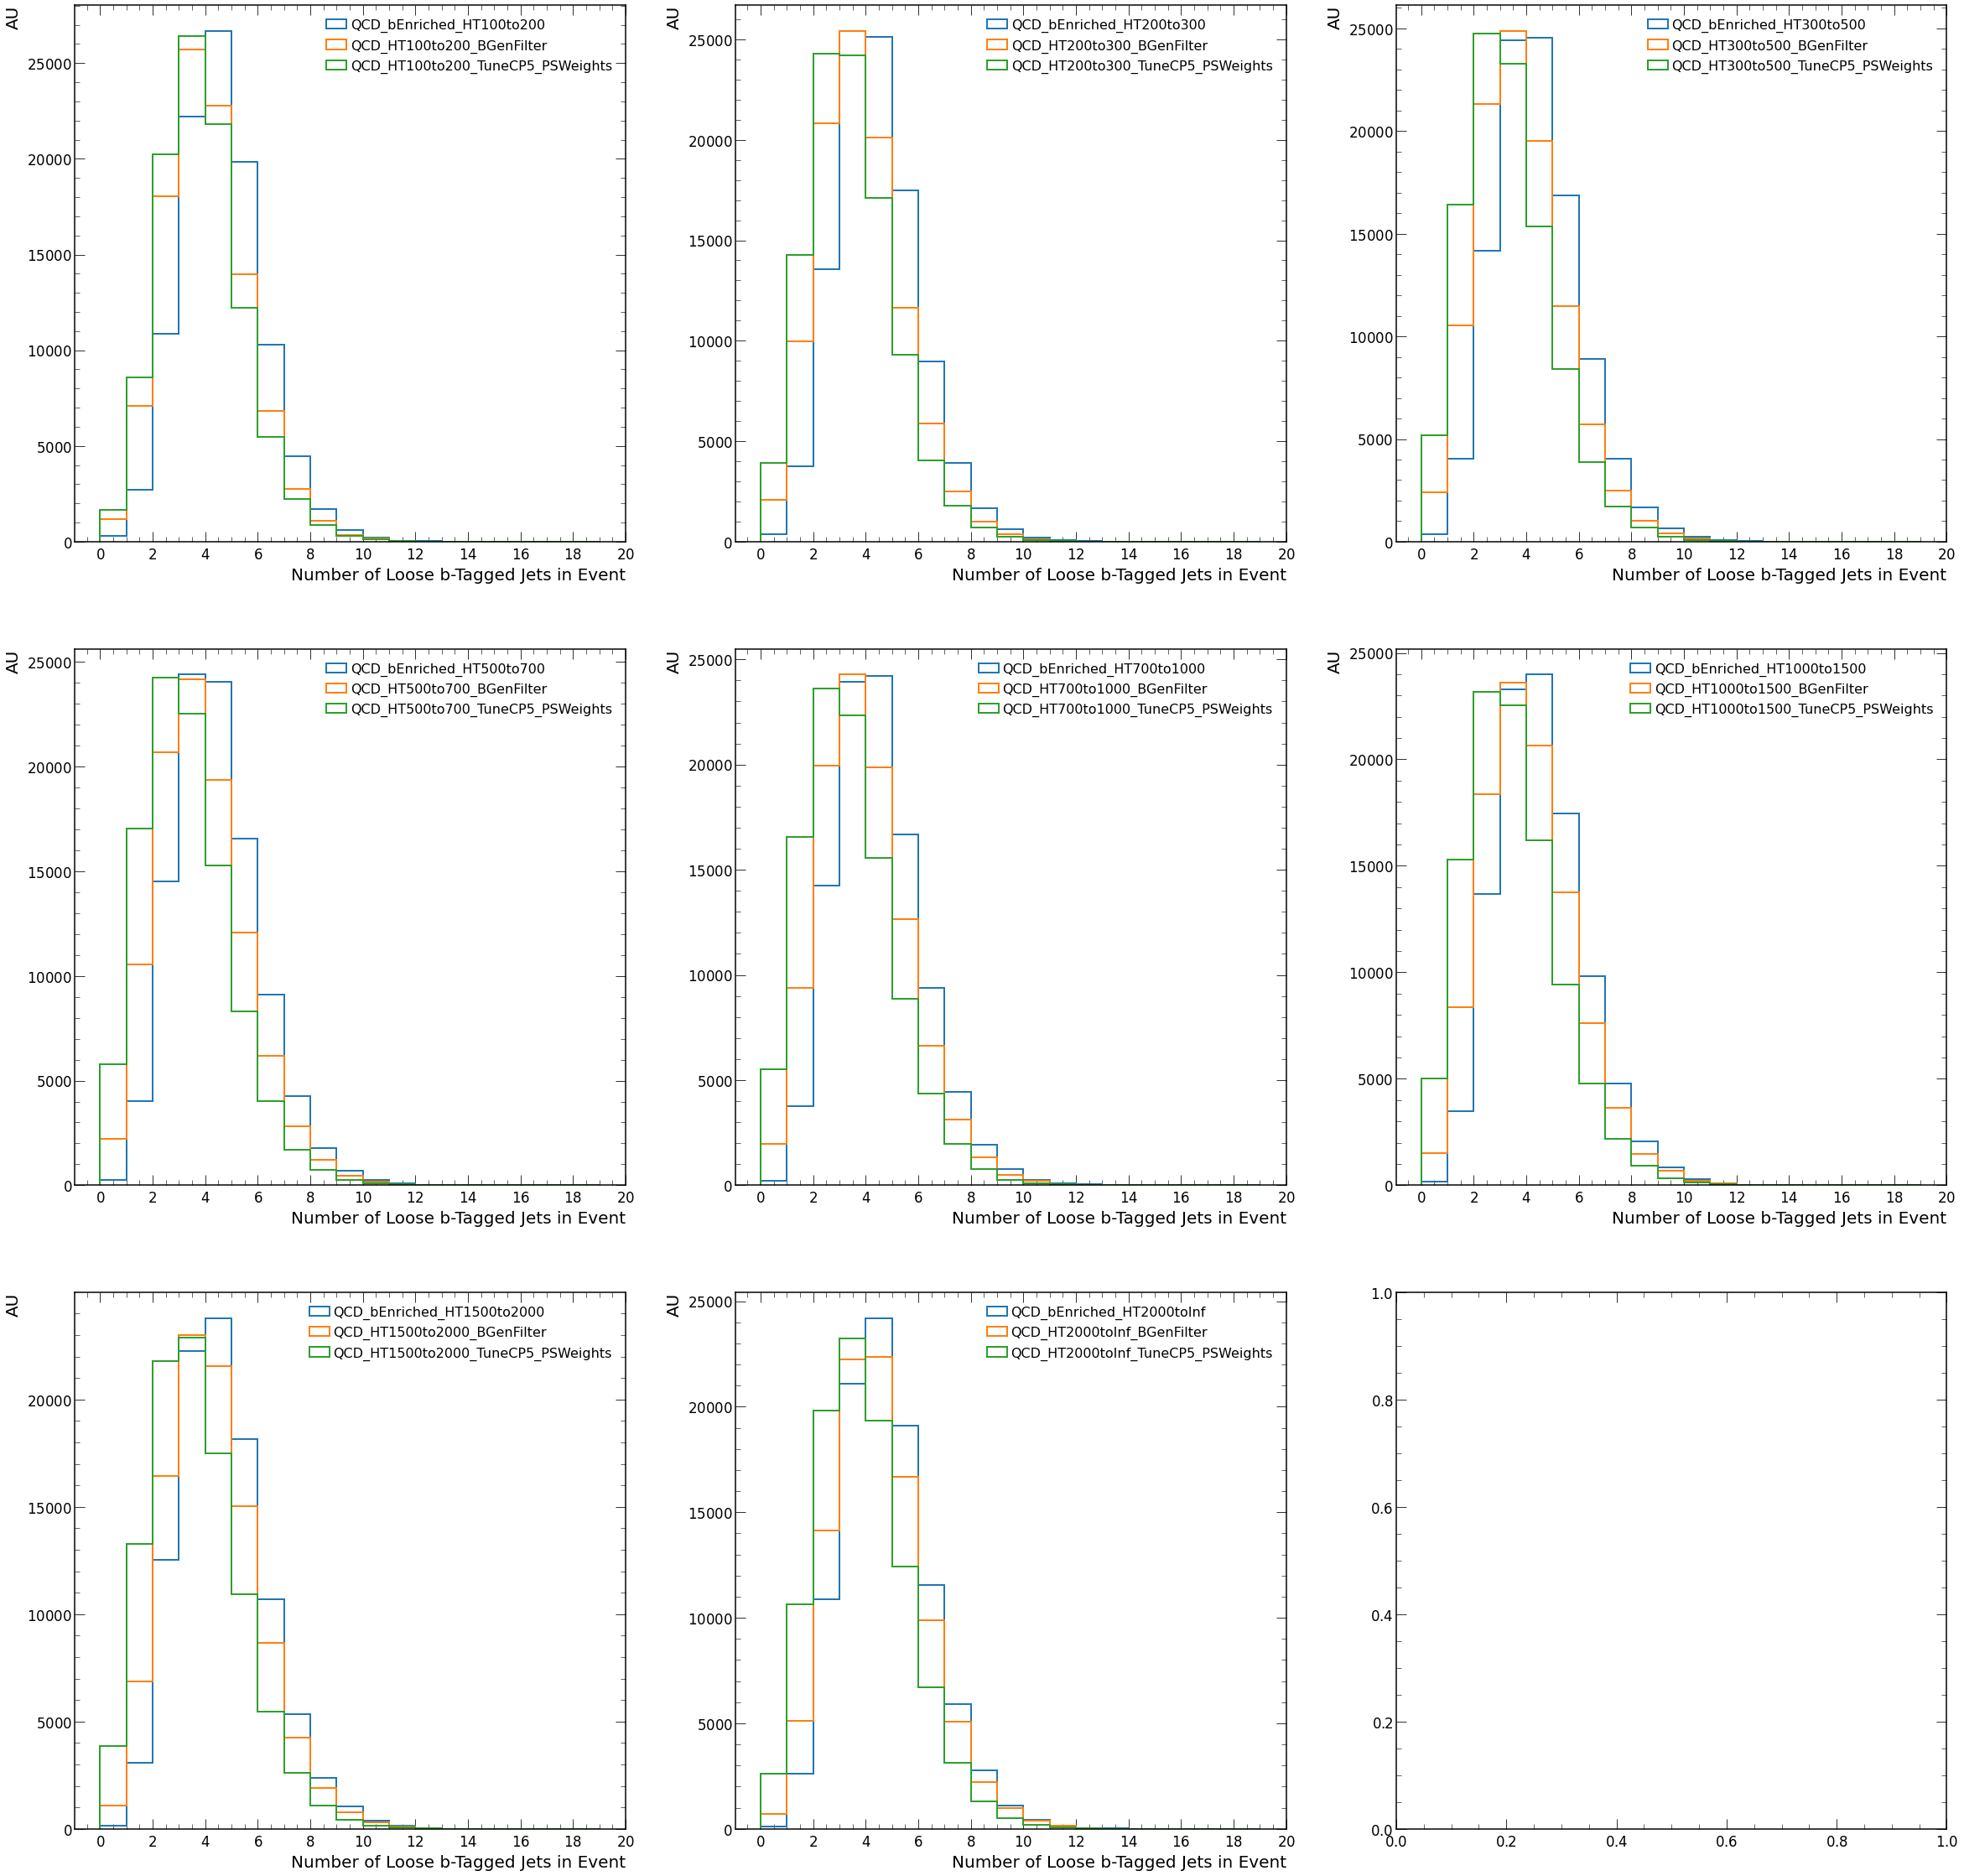

In [27]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(40,40))

bins = np.arange(20)
for i,ax in enumerate(axs.flatten()[:-1]):
    j = indices[i]

    Hist(enriched_n_loose_bs[i], bins=bins, ax=ax, label=enriched.sample[i], weights=enriched.scales[i]/enriched.scales[i].sum())
    Hist(genfilter_n_loose_bs[i], bins=bins, ax=ax, label=genfilter.sample[i], weights=genfilter.scales[i]/genfilter.scales[i].sum())
    Hist(htbins_n_loose_bs[j], bins=bins, ax=ax, label=htbins.sample[j], weights=htbins.scales[j]/htbins.scales[j].sum())
    
    ax.set_xticks(range(0,21,2))
    ax.set_xlabel(r"Number of Loose b-Tagged Jets in Event")
    ax.set_ylabel('AU')

In [29]:
enriched.jet_pt

[<Array [[27.2, 25.3, 17.6, ... 12.5, 28, 16]] type='100000 * var * float32'>,
 <Array [[73.9, 19.4, 31.5, ... 44.1, 36.3]] type='100000 * var * float32'>,
 <Array [[75.6, 39.7, 15, ... 19.9, 109, 15.6]] type='100000 * var * float32'>,
 <Array [[70.7, 16.8, 16.2, ... 29.4, 26.3]] type='100000 * var * float32'>,
 <Array [[331, 14.3, 12.5, ... 18.4, 16.9]] type='100000 * var * float32'>,
 <Array [[363, 152, 84.2, ... 486, 31.1, 23.9]] type='100000 * var * float32'>,
 <Array [[15.9, 509, 405, ... 21.7, 16.6, 18.6]] type='100000 * var * float32'>,
 <Array [[968, 1.08e+03, 83.4, ... 265, 54, 23]] type='100000 * var * float32'>]

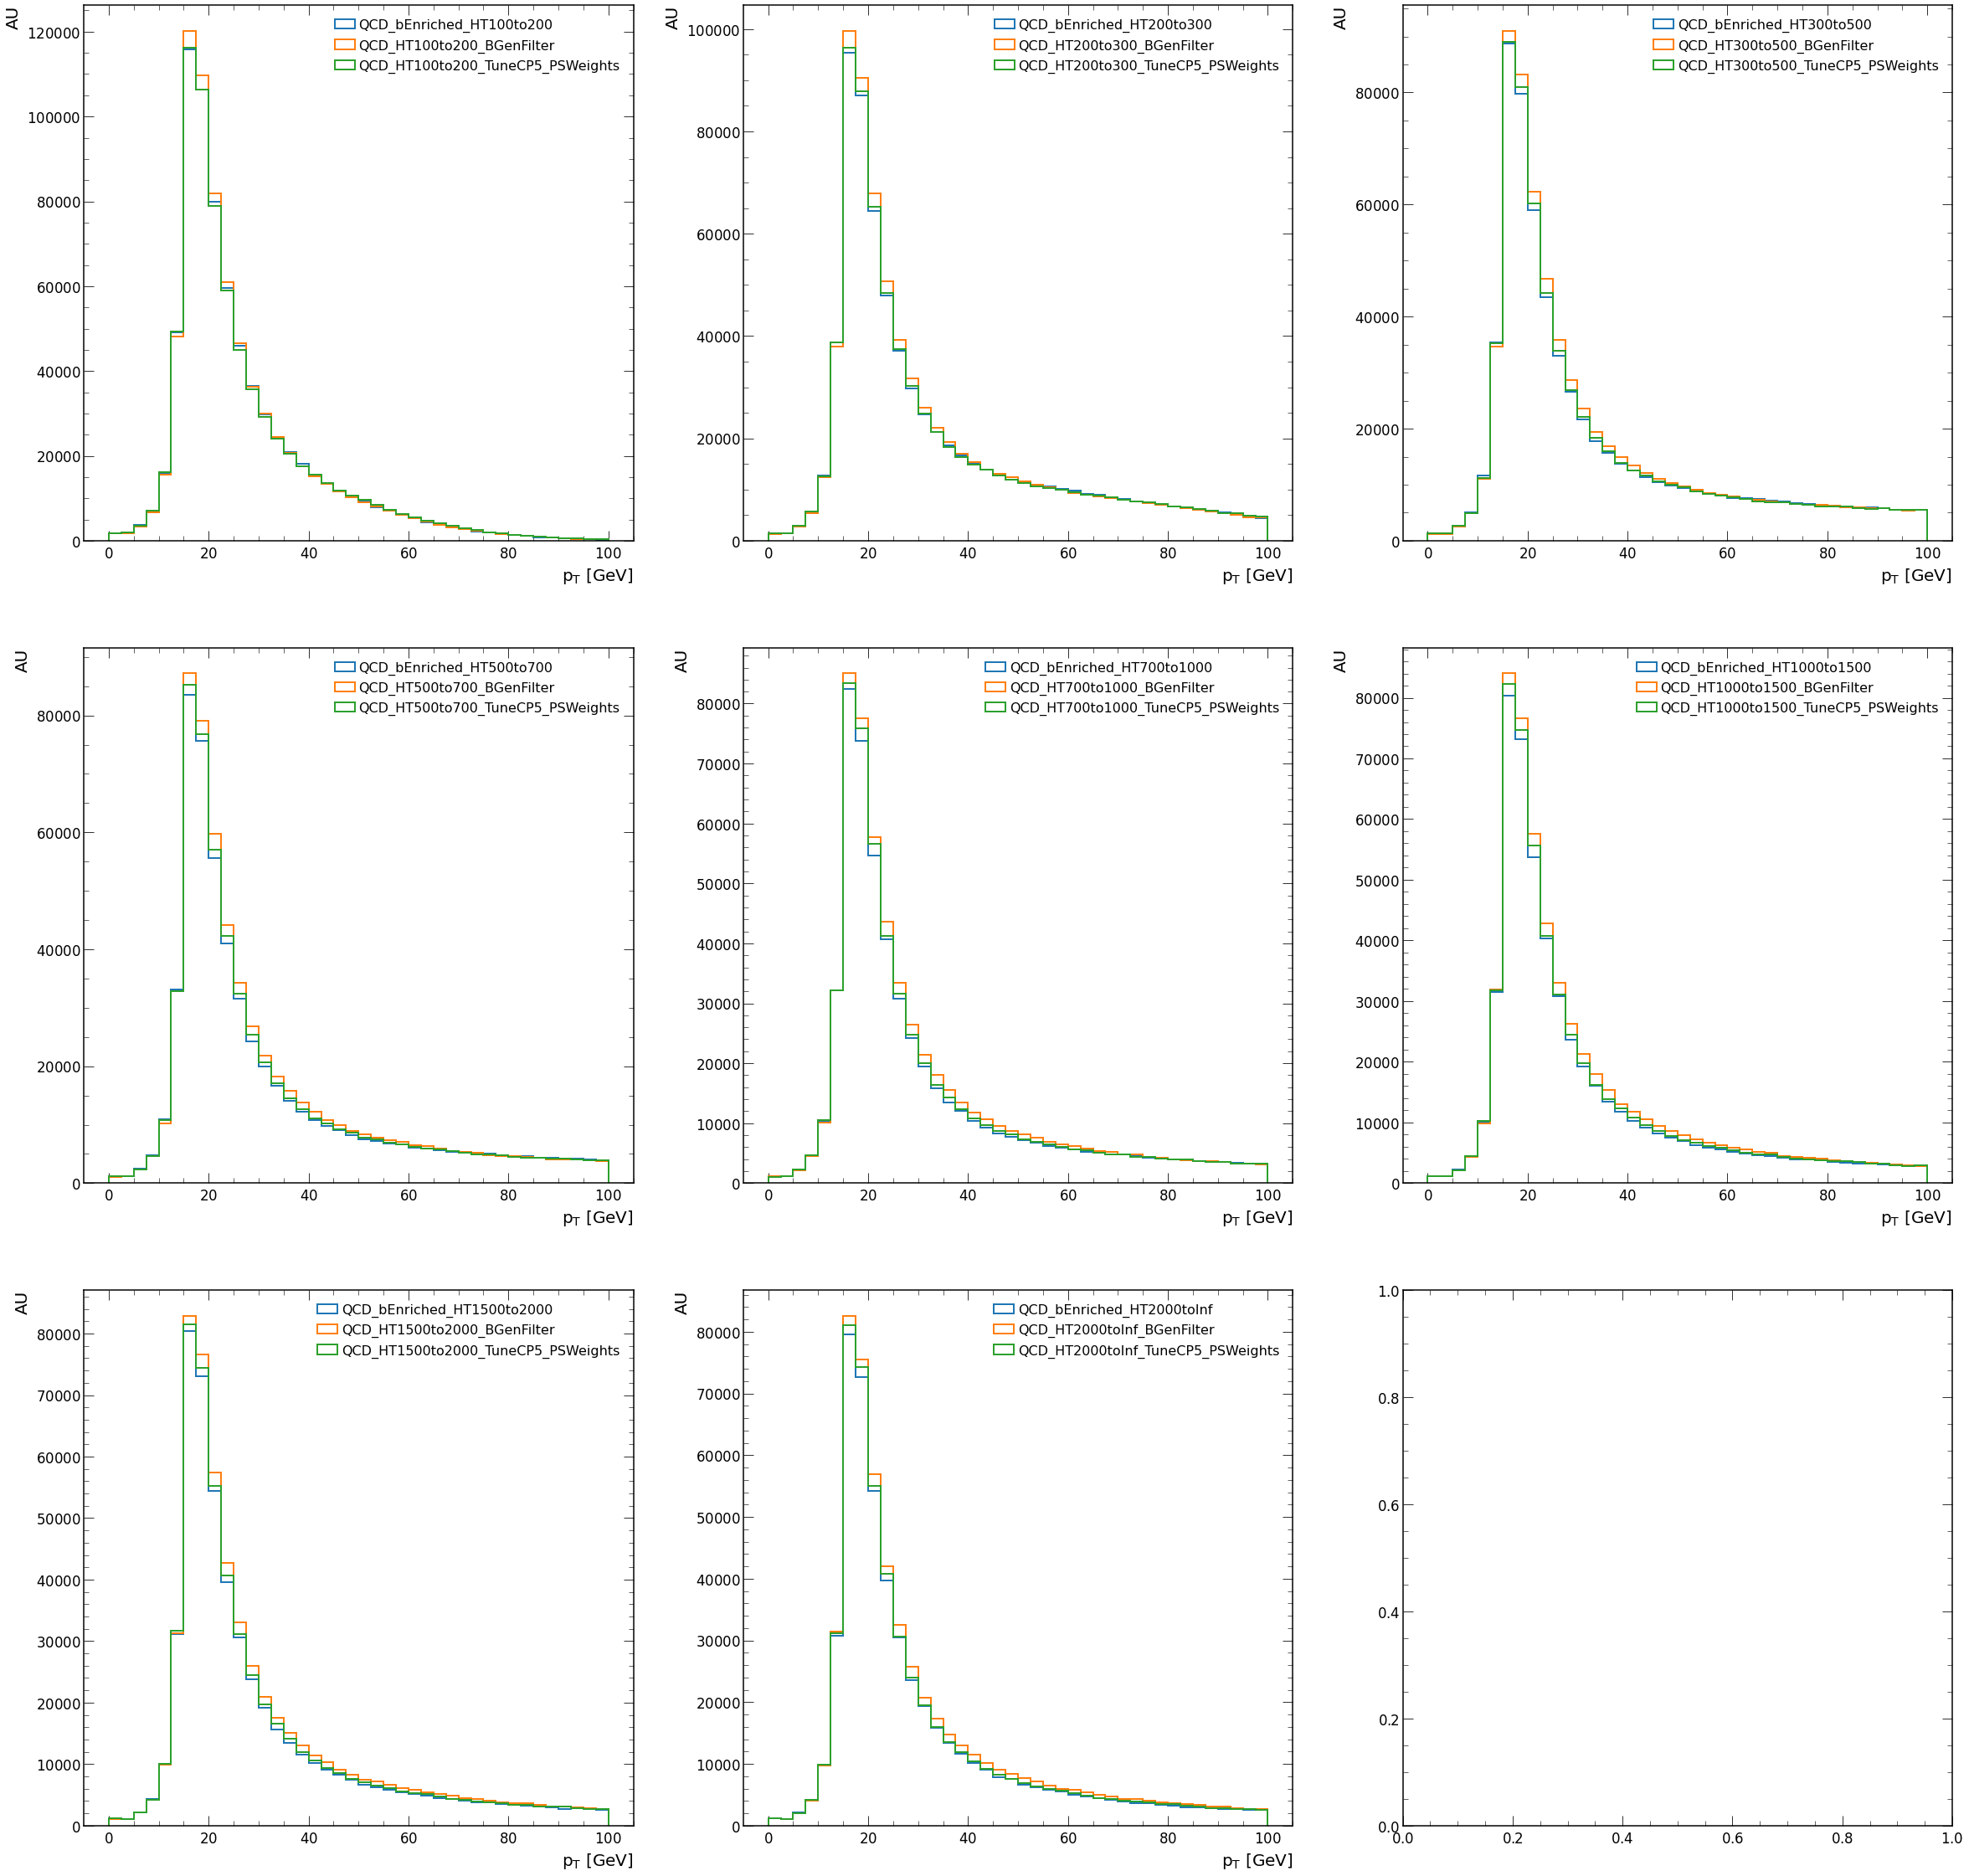

In [31]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(40,40))

bins = np.linspace(0,100,41)
for i,ax in enumerate(axs.flatten()[:-1]):
    j = indices[i]

    Hist(enriched.jet_pt[i], bins=bins, ax=ax, label=enriched.sample[i], weights=enriched.scales[i]/enriched.scales[i].sum())
    Hist(genfilter.jet_pt[i], bins=bins, ax=ax, label=genfilter.sample[i], weights=genfilter.scales[i]/genfilter.scales[i].sum())
    Hist(htbins.jet_pt[j], bins=bins, ax=ax, label=htbins.sample[j], weights=htbins.scales[j]/htbins.scales[j].sum())
    
    # ax.set_xticks(range(0,21,2))
    ax.set_xlabel(r"$p_T$ [GeV]")
    ax.set_ylabel('AU')

In [36]:
ak.sum(enriched.jet_pt[0], axis=1)

<Array [269, 133, 212, 223, ... 202, 217, 128] type='100000 * float32'>

In [43]:
l,h = enriched.sample[0].split('_')[-1].split('HT')[1].split('to')
int(l),int(h)

(100, 200)

In [12]:
L = [0, 0, 0, 200, 500, 700, 1000, 1000]
H = [500, 700, 1000, 1100, 1500, 2000, 2500, 4500]

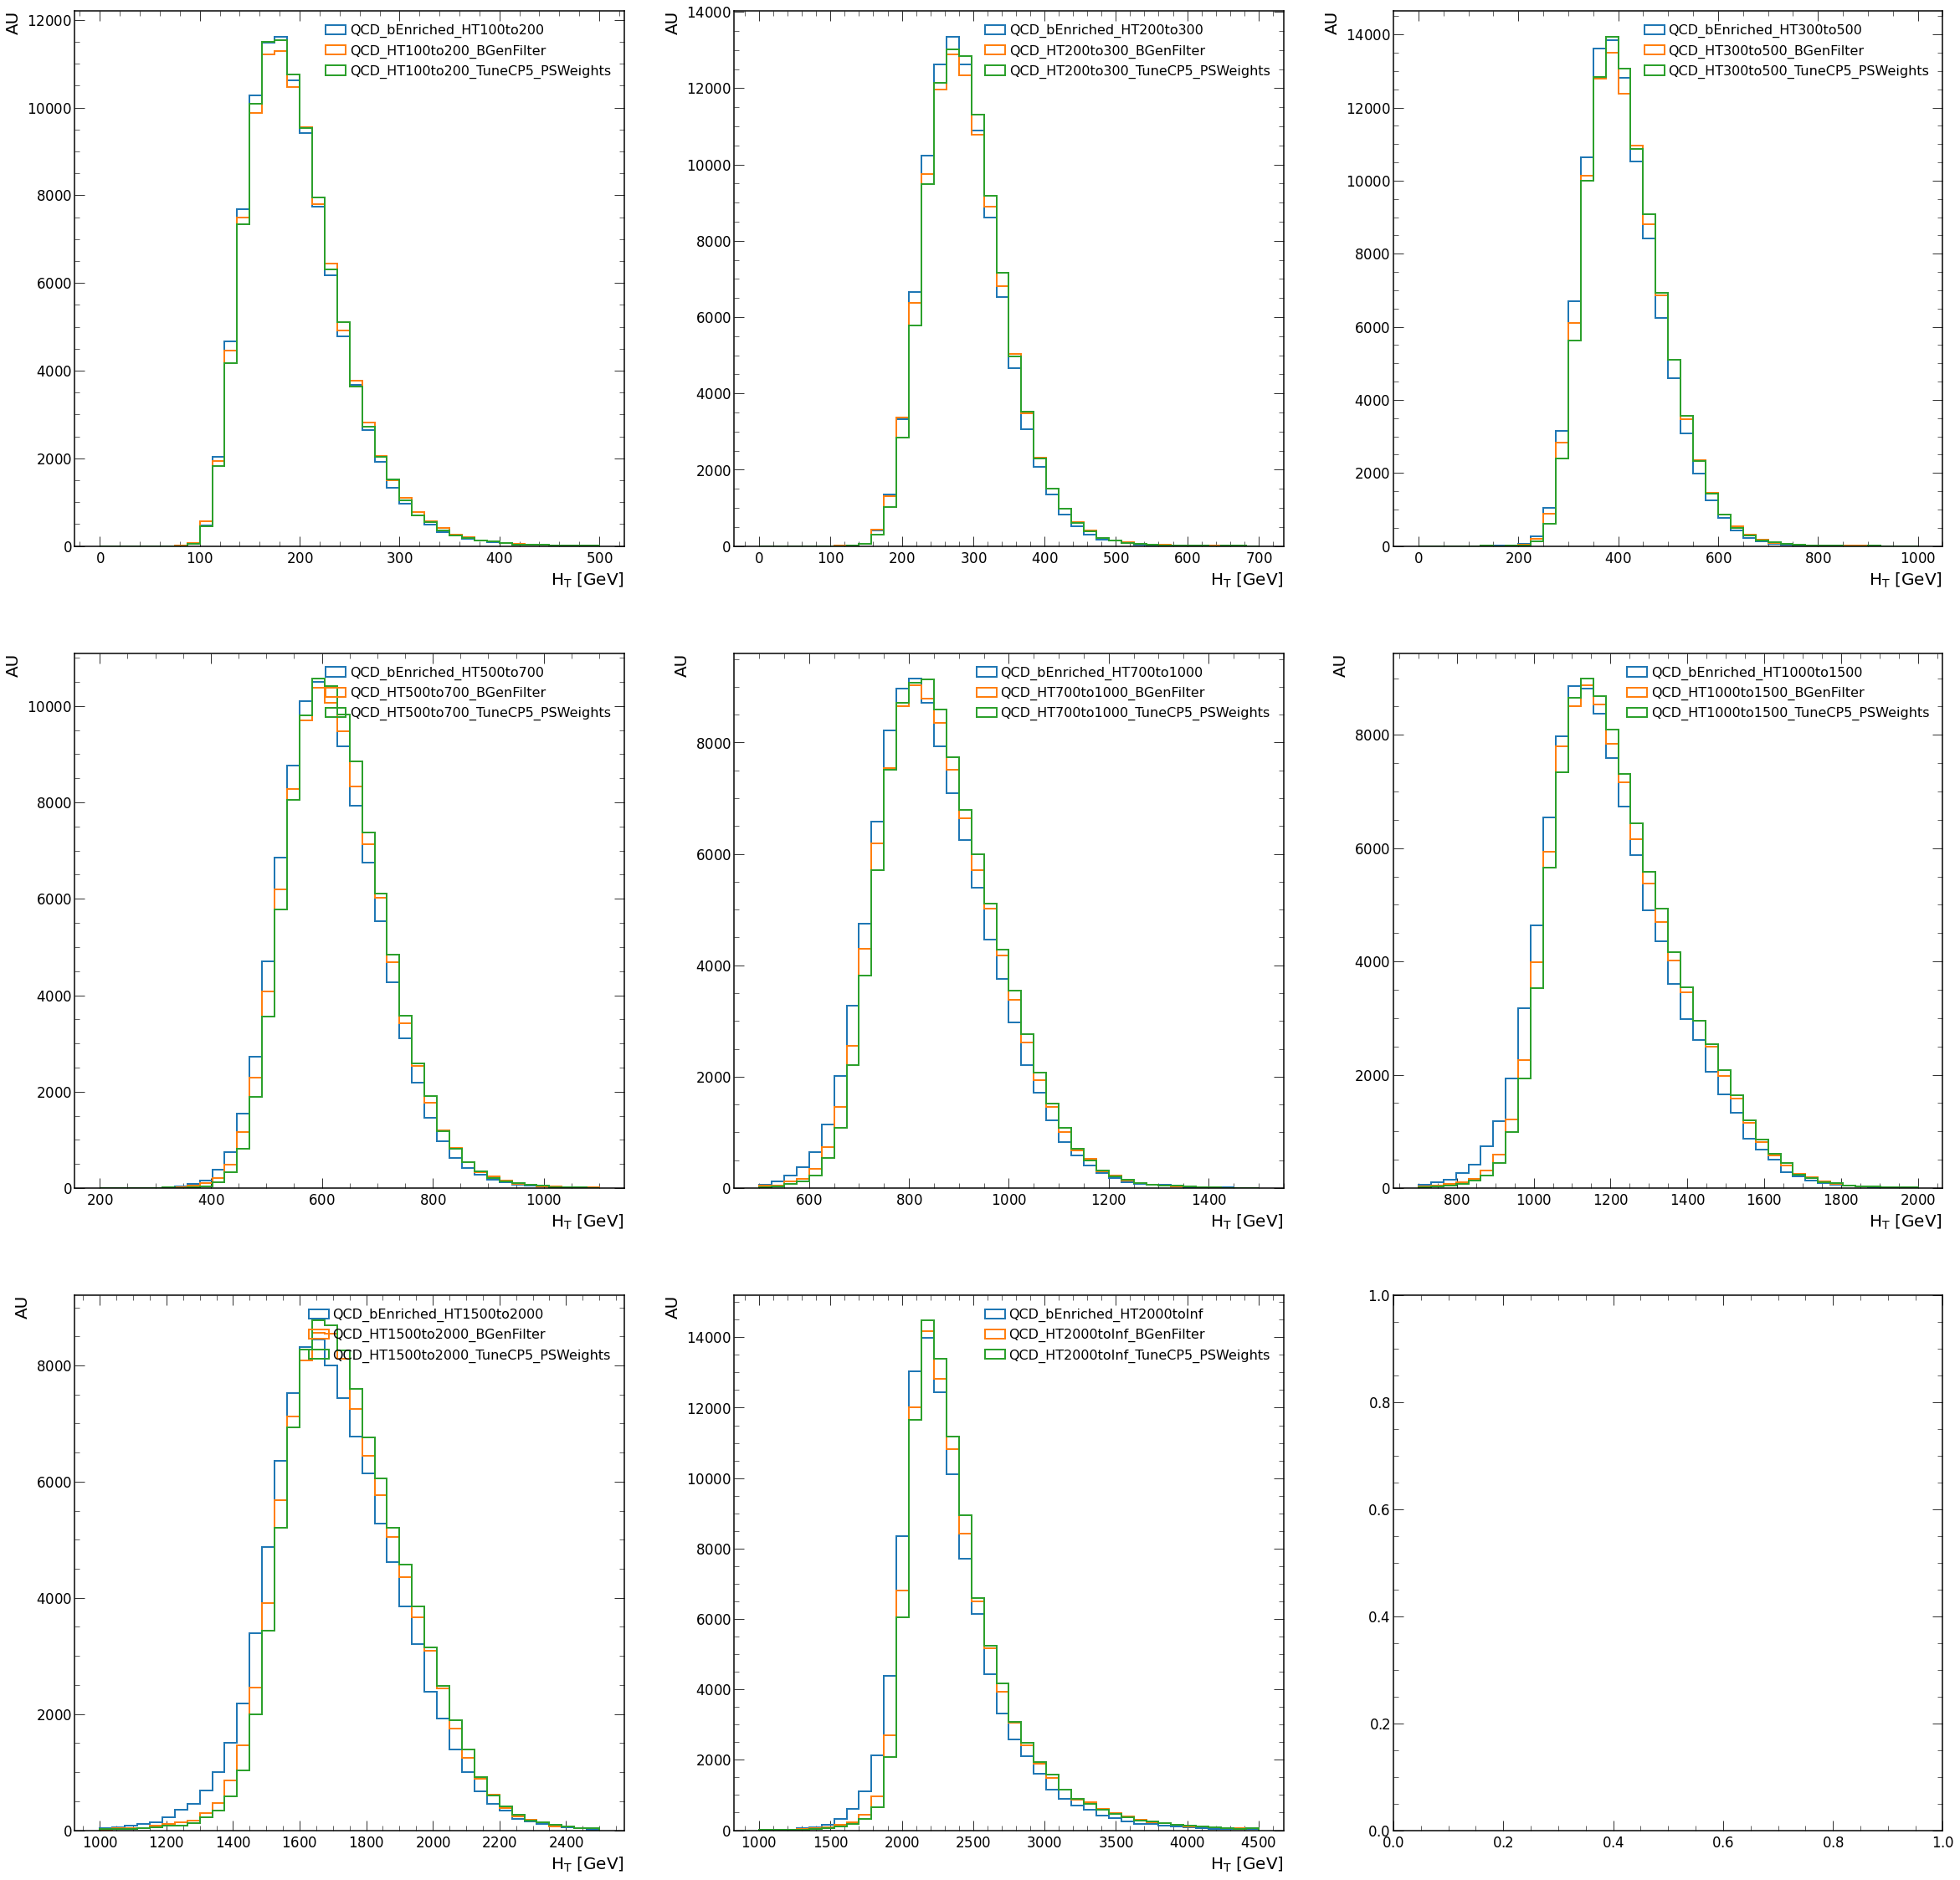

In [51]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(40,40))

for i,ax in enumerate(axs.flatten()[:-1]):
    j = indices[i]

    l,h = enriched.sample[i].split('_')[-1].split('HT')[1].split('to')
    if h == 'Inf': h = 5000
    l,h = int(l),int(h)

    l,h = L[i],H[i]
    bins = np.linspace(l,h,41)
    # bins = np.linspace(0,5000,41)

    Hist(ak.sum(enriched.jet_pt[i], axis=1), bins=bins, ax=ax, label=enriched.sample[i], weights=enriched.scales[i]/enriched.scales[i].sum())
    Hist(ak.sum(genfilter.jet_pt[i], axis=1), bins=bins, ax=ax, label=genfilter.sample[i], weights=genfilter.scales[i]/genfilter.scales[i].sum())
    Hist(ak.sum(htbins.jet_pt[j], axis=1), bins=bins, ax=ax, label=htbins.sample[j], weights=htbins.scales[j]/htbins.scales[j].sum())
    
    # ax.set_xticks(range(0,21,2))
    ax.set_xlabel(r"$H_T$ [GeV]")
    ax.set_ylabel('AU')

fig.savefig('plots/qcd/qcd_HT.pdf')

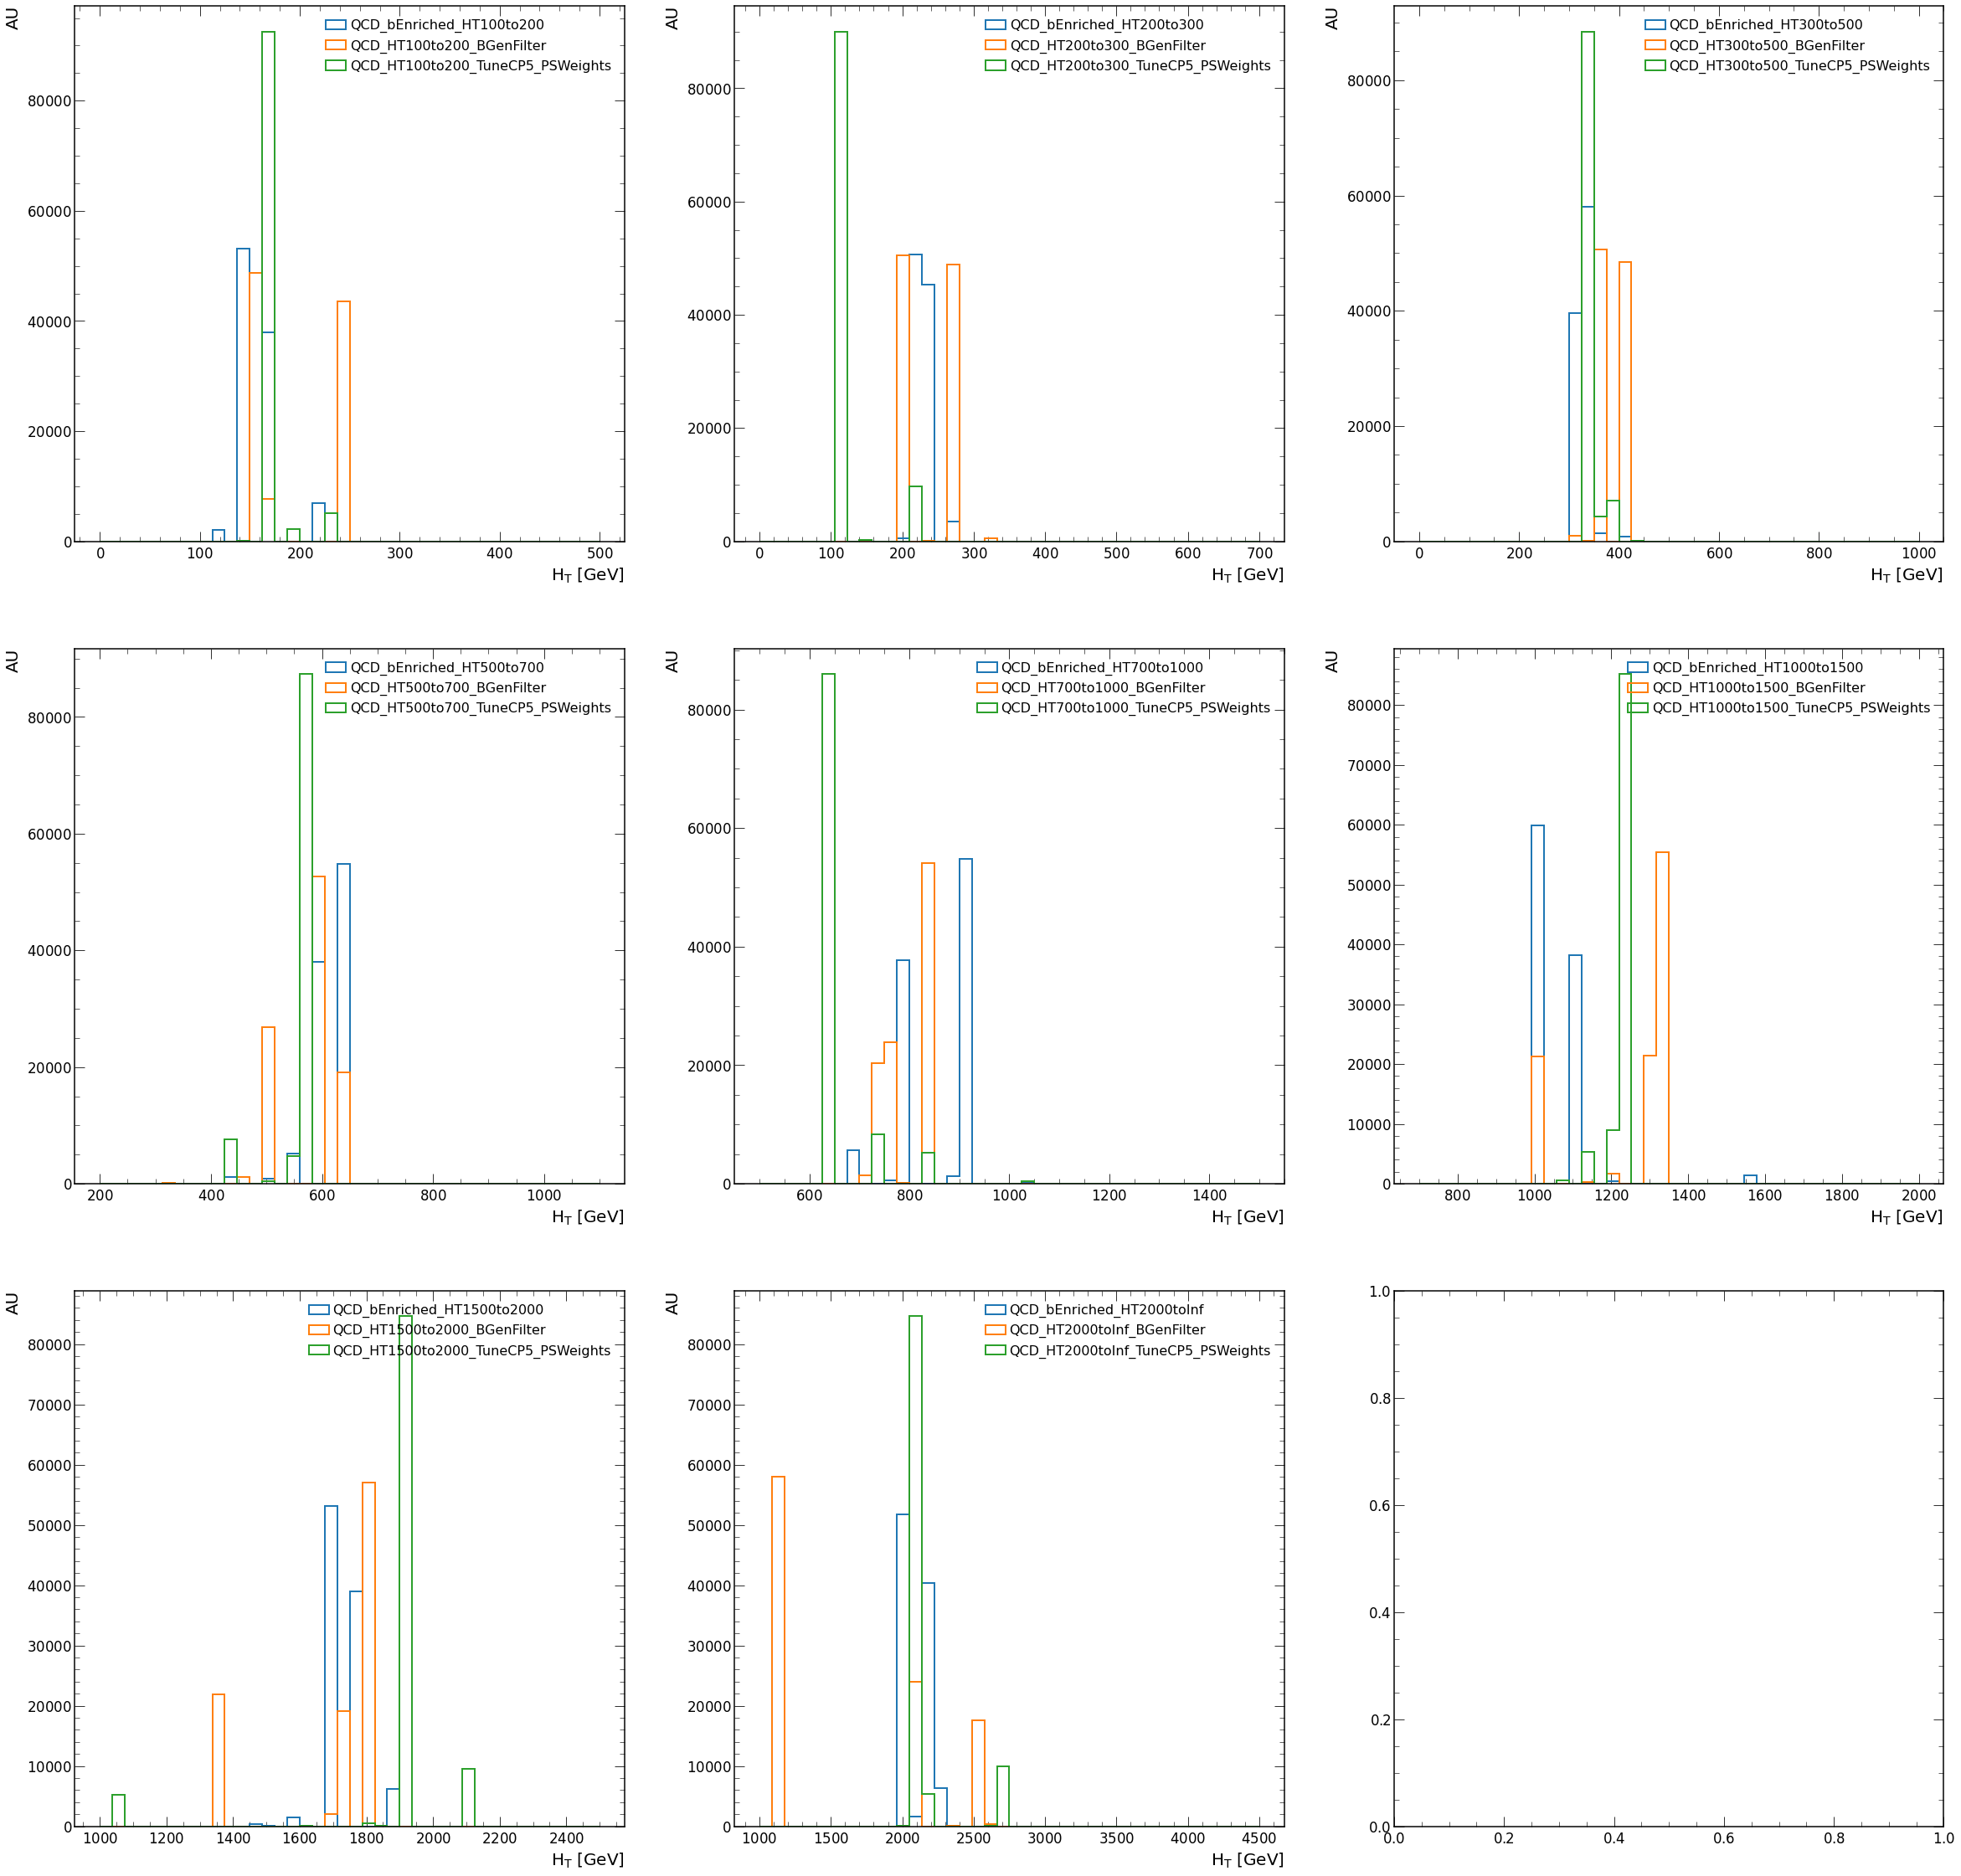

In [13]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(40,40))

for i,ax in enumerate(axs.flatten()[:-1]):
    j = indices[i]

    l,h = enriched.sample[i].split('_')[-1].split('HT')[1].split('to')
    if h == 'Inf': h = 5000
    l,h = int(l),int(h)

    l,h = L[i],H[i]
    bins = np.linspace(l,h,41)
    # bins = np.linspace(0,5000,41)

    Hist(ak.sum(enriched.jet_pt[i][enriched_b_mask[i]], axis=1), bins=bins, ax=ax, label=enriched.sample[i], weights=enriched.scales[i]/enriched.scales[i].sum())
    Hist(ak.sum(genfilter.jet_pt[i][genfilter_b_mask[i]], axis=1), bins=bins, ax=ax, label=genfilter.sample[i], weights=genfilter.scales[i]/genfilter.scales[i].sum())
    Hist(ak.sum(htbins.jet_pt[j][htbins_b_mask[j]], axis=1), bins=bins, ax=ax, label=htbins.sample[j], weights=htbins.scales[j]/htbins.scales[j].sum())
    
    # ax.set_xticks(range(0,21,2))
    ax.set_xlabel(r"$H_T$ [GeV]")
    ax.set_ylabel('AU')

# fig.savefig('plots/qcd/qcd_HT.pdf')

In [54]:
L = [0]*8
H = [4000, 4000, 4000, 4250, 4500, 5000, 6000, 7000]

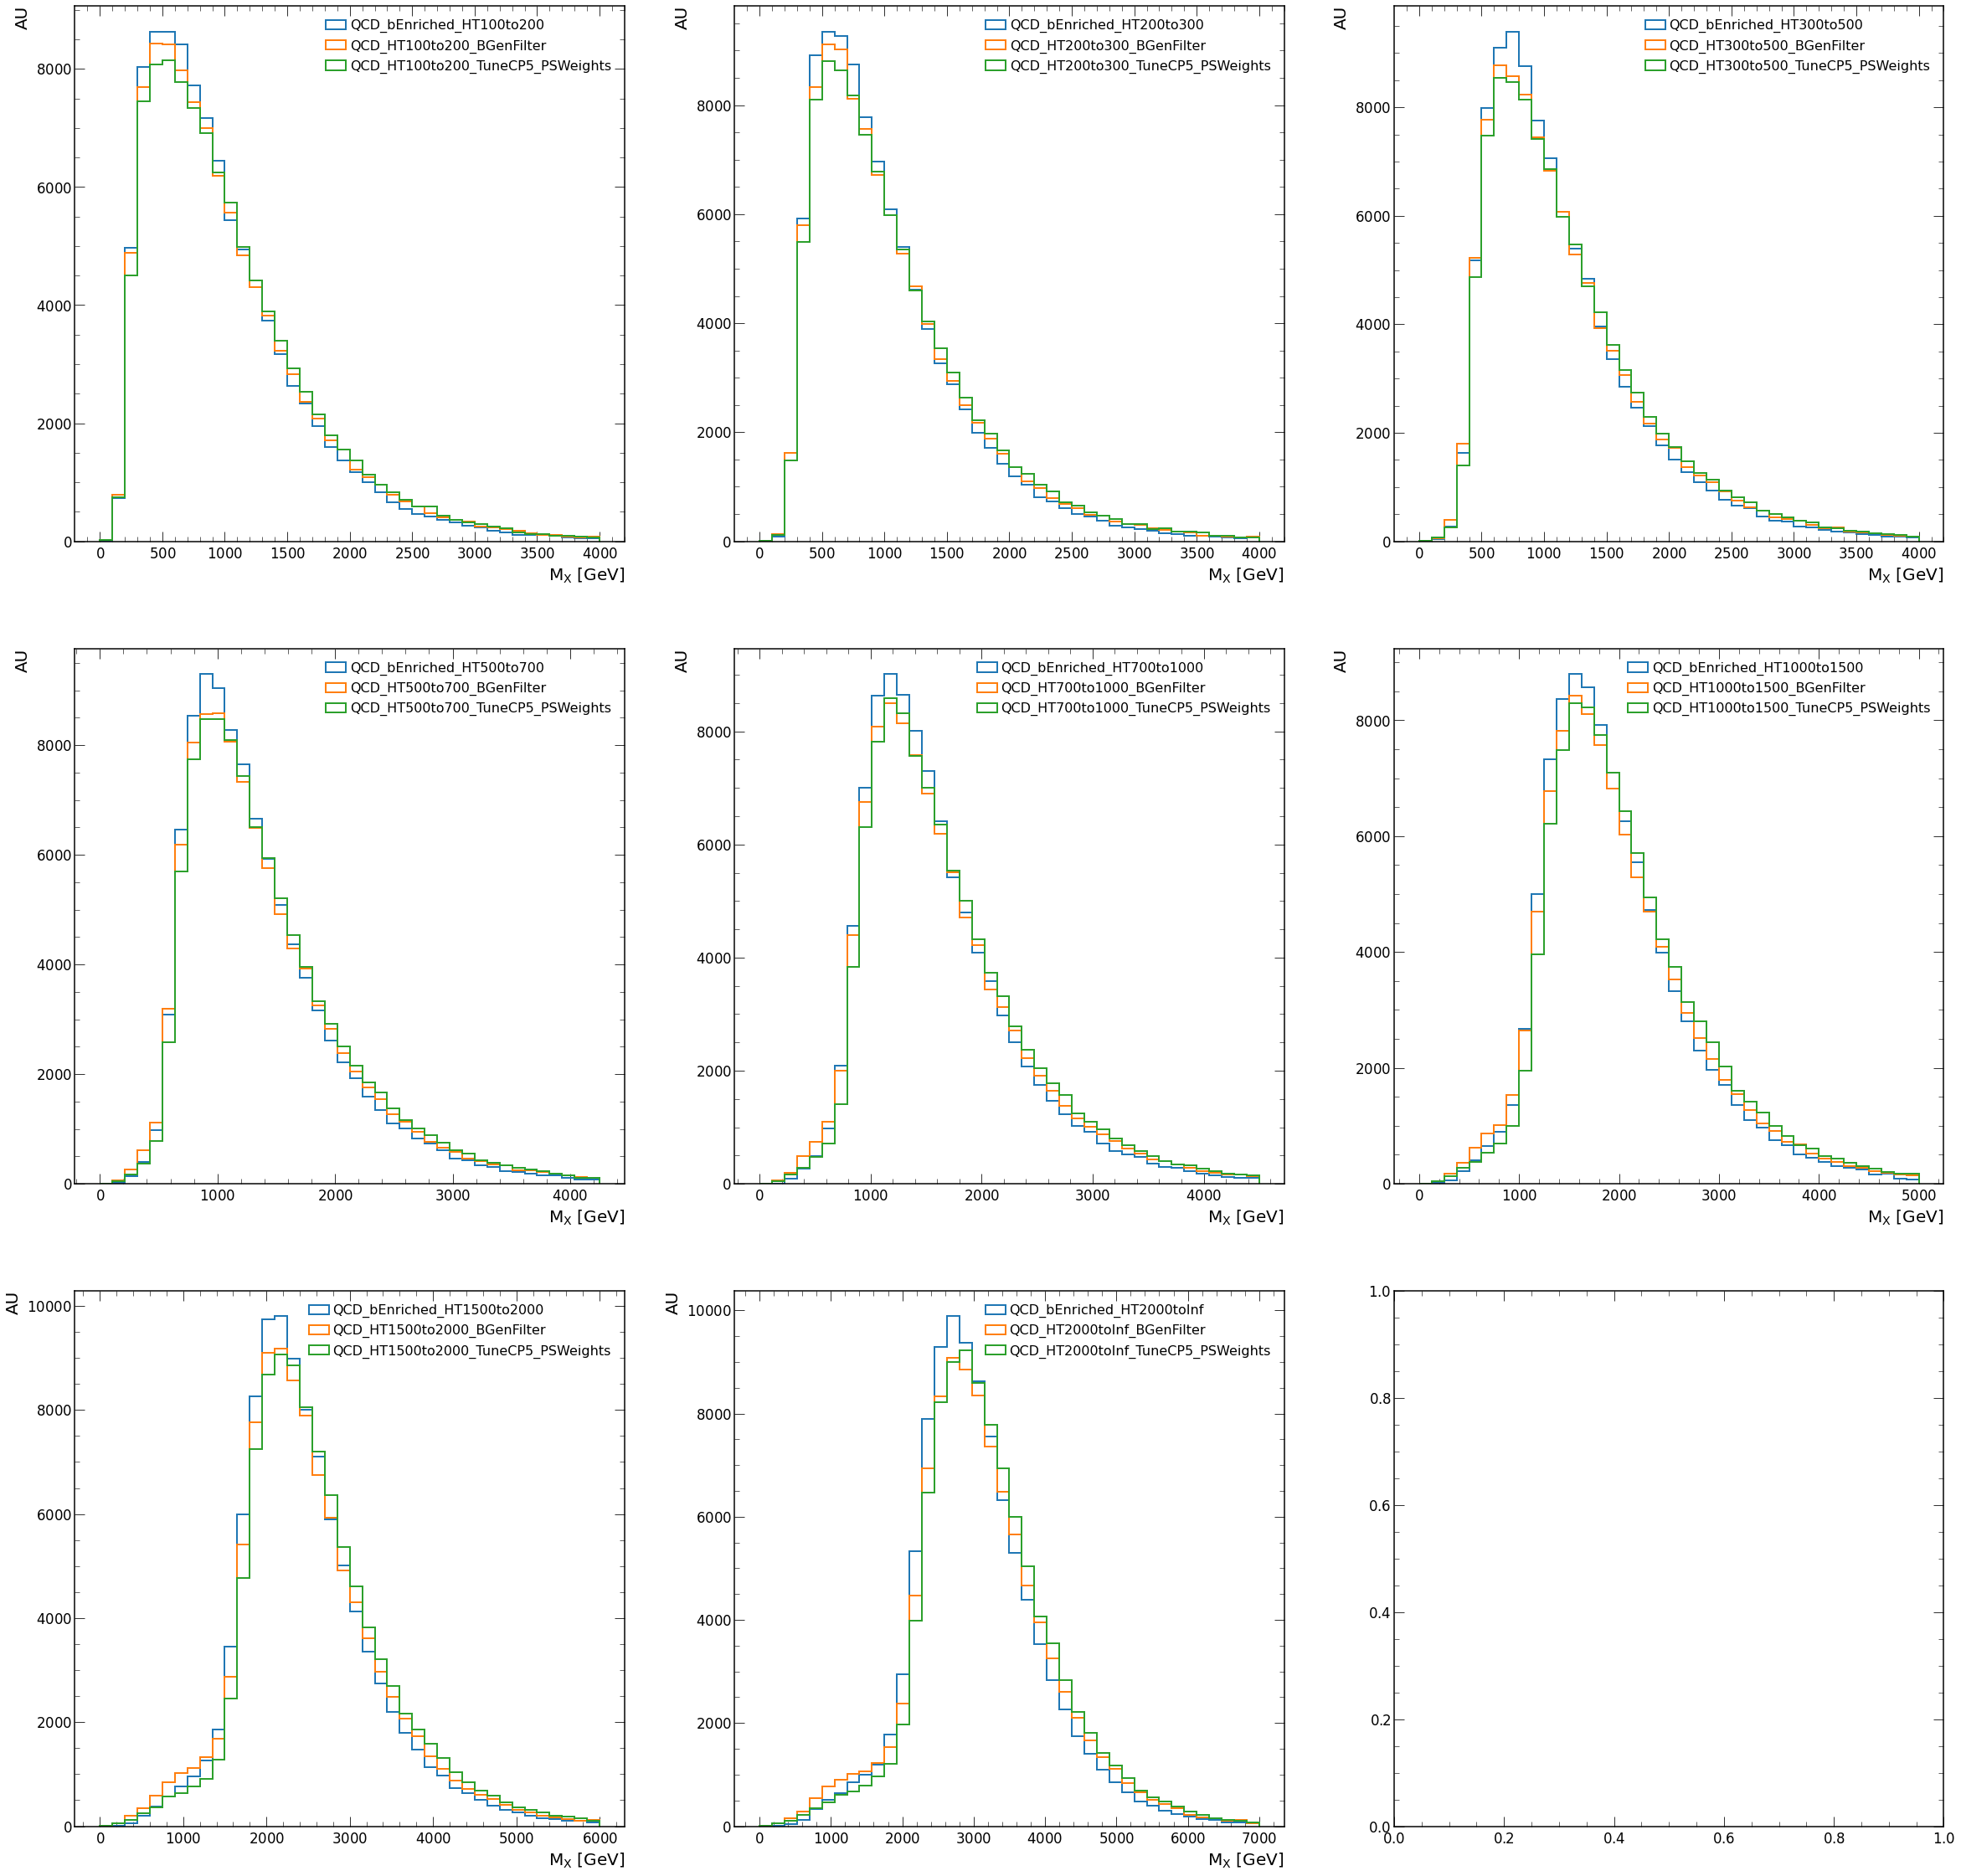

In [55]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(40,40))

bins = np.linspace(0,10000,41)
for i,ax in enumerate(axs.flatten()[:-1]):
    j = indices[i]

    l,h = L[i],H[i]
    bins = np.linspace(l,h,41)

    n = Hist(enriched.X_m[i], bins=bins, ax=ax, label=enriched.sample[i], weights=enriched.scales[i]/enriched.scales[i].sum())
    n = Hist(genfilter.X_m[i], bins=bins, ax=ax, label=genfilter.sample[i], weights=genfilter.scales[i]/genfilter.scales[i].sum())
    n = Hist(htbins.X_m[j], bins=bins, ax=ax, label=htbins.sample[j], weights=htbins.scales[j]/htbins.scales[j].sum())

    ax.set_xlabel(r"$M_X$ [GeV]")
    ax.set_ylabel("AU")

In [57]:
L = [0]*8
H = [2500, 2500, 2500, 3000, 3000, 3000, 4000, 4500]

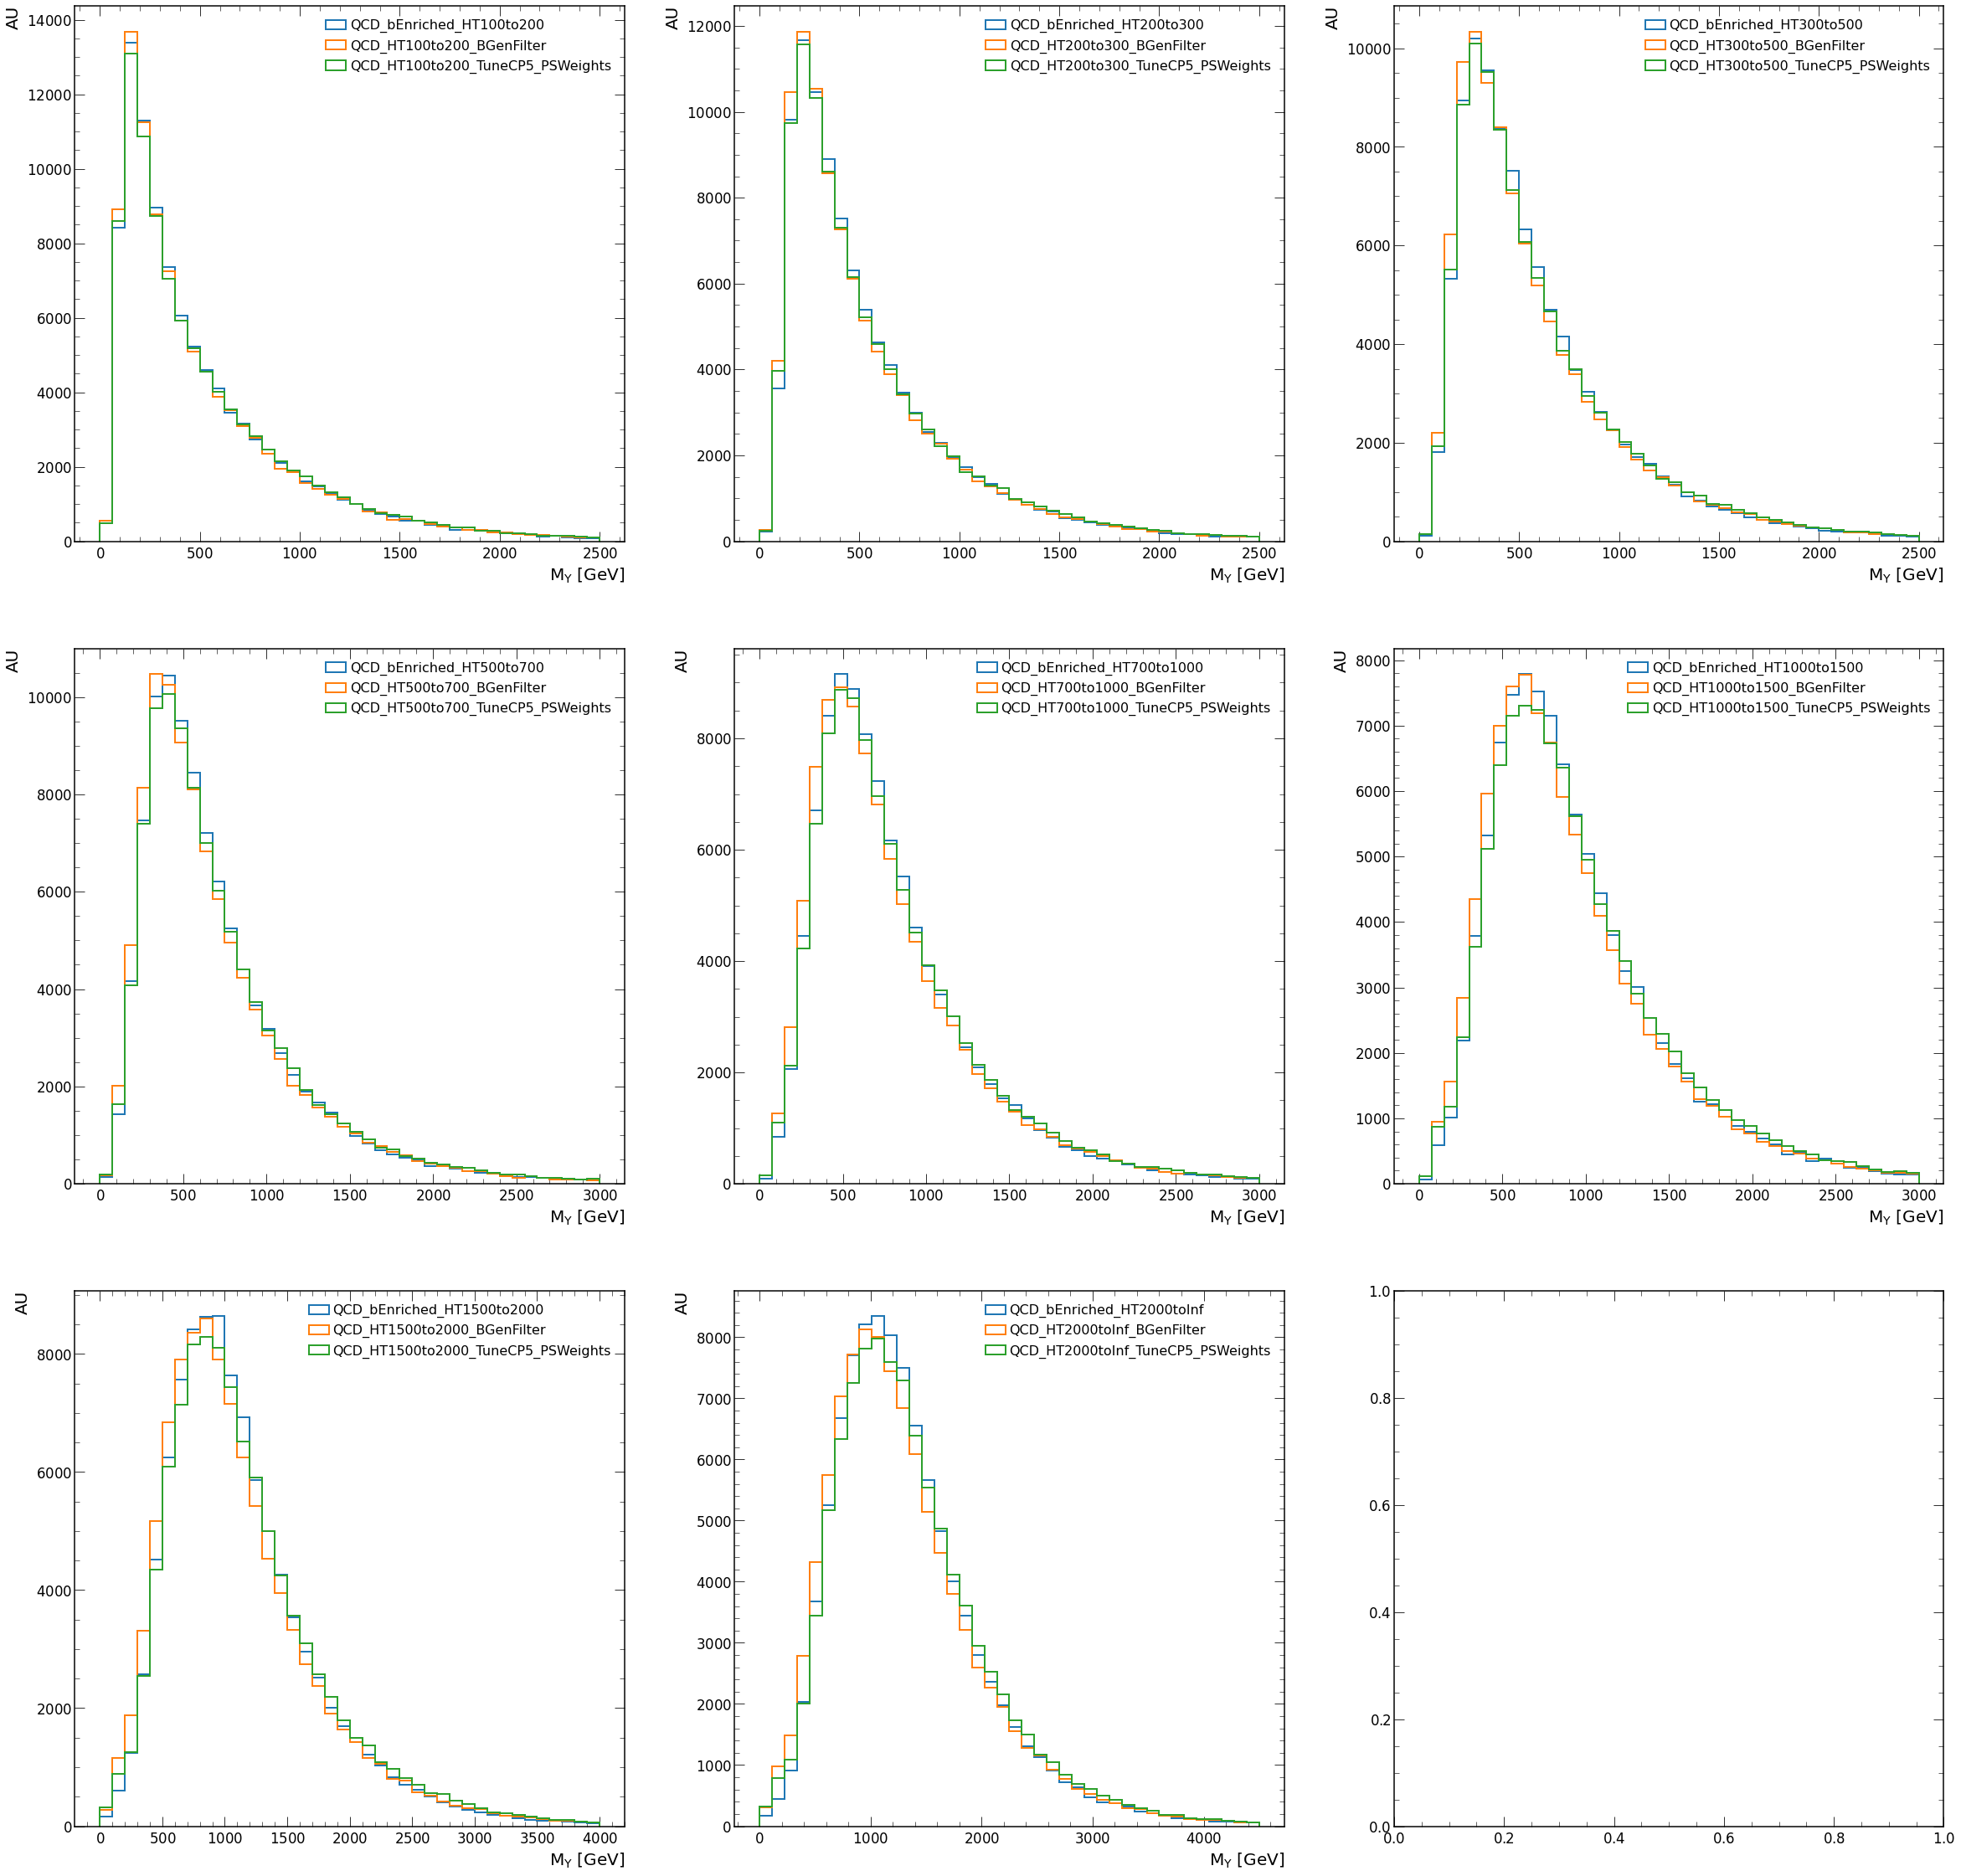

In [58]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(40,40))

bins = np.linspace(0,10000,41)
for i,ax in enumerate(axs.flatten()[:-1]):
    j = indices[i]

    l,h = L[i],H[i]
    bins = np.linspace(l,h,41)

    n = Hist(enriched.Y_m[i], bins=bins, ax=ax, label=enriched.sample[i], weights=enriched.scales[i]/enriched.scales[i].sum())
    n = Hist(genfilter.Y_m[i], bins=bins, ax=ax, label=genfilter.sample[i], weights=genfilter.scales[i]/genfilter.scales[i].sum())
    n = Hist(htbins.Y_m[j], bins=bins, ax=ax, label=htbins.sample[j], weights=htbins.scales[j]/htbins.scales[j].sum())

    ax.set_xlabel(r"$M_Y$ [GeV]")
    ax.set_ylabel("AU")